In [2]:
%pip install -r requirements.txt
import os
import pickle
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from collections import defaultdict
from sklearn.decomposition import PCA
from statsmodels.api import OLS, add_constant
from sklearn.preprocessing import StandardScaler

Matplotlib is building the font cache; this may take a moment.


In [3]:
os.chdir("C:/Users/gabeyie/OneDrive - University of Tennessee/Documents/IJF_Paper")
print("Current Working Directory:", os.getcwd())
results_folder = "main results"
if not os.path.exists(results_folder):
    os.makedirs(results_folder)

Current Working Directory: C:\Users\gabeyie\OneDrive - University of Tennessee\Documents\IJF_Paper


In [4]:
plt.rcParams.update({
    'font.size': 20,
    'axes.titlesize': 20,
    'axes.labelsize': 20,
    'xtick.labelsize': 15,
    'ytick.labelsize': 20,
})

In [5]:
# This code loads the predictions for all four models
with open("Forecasts/Sahm_Rule_Article_predictions_dict.pkl", "rb") as f:
    Sahm_Rule_Article_predictions = pickle.load(f)

with open("Forecasts/Sahm_Rule_Headline_predictions_dict.pkl", "rb") as f:
    Sahm_Rule_Headline_predictions = pickle.load(f)

with open("Forecasts/Continuous_Article_predictions_dict.pkl", "rb") as f:
    Continuous_Article_predictions = pickle.load(f)

with open("Forecasts/Continuous_Headline_predictions_dict.pkl", "rb") as f:
    Continuous_Headline_predictions = pickle.load(f)

# This code loads the variables selected from the Elastic nets and PCA for all four models
with open("Forecasts/Sahm_Rule_Variables.pkl", "rb") as f:
    variables = pickle.load(f)
    Sahm_Rule_Article_elasticnet_feature_counts = variables["Sahm_Rule_Article_elasticnet_feature_counts"]
    Sahm_Rule_Headline_elasticnet_feature_counts = variables["Sahm_Rule_Headline_elasticnet_feature_counts"]
    Sahm_Rule_Article_pca_components_counts = variables["Sahm_Rule_Article_pca_components_counts"]
    Sahm_Rule_Headline_pca_components_counts = variables["Sahm_Rule_Headline_pca_components_counts"]
    Sahm_Rule_Article_column_names_dict = variables["Sahm_Rule_Article_column_names_dict"]
    Sahm_Rule_Headline_column_names_dict = variables["Sahm_Rule_Headline_column_names_dict"]
    Sahm_Rule_Article_top_features_per_model= variables["Sahm_Rule_Article_top_features_per_model"]
    Sahm_Rule_Headline_top_features_per_model = variables["Sahm_Rule_Headline_top_features_per_model"]

with open("Forecasts/Continuous_Variables.pkl", "rb") as f:
    variables = pickle.load(f)
    Continuous_Article_elasticnet_feature_counts = variables["Continuous_Article_elasticnet_feature_counts"]
    Continuous_Headline_elasticnet_feature_counts = variables["Continuous_Headline_elasticnet_feature_counts"]
    Continuous_Article_pca_components_counts = variables["Continuous_Article_pca_components_counts"]
    Continuous_Headline_pca_components_counts = variables["Continuous_Headline_pca_components_counts"]
    Continuous_Article_column_names_dict = variables["Continuous_Article_column_names_dict"]
    Continuous_Headline_column_names_dict = variables["Continuous_Headline_column_names_dict"]
    Continuous_Article_top_features_per_model= variables["Continuous_Article_top_features_per_model"]
    Continuous_Headline_top_features_per_model = variables["Continuous_Headline_top_features_per_model"]

# This code loads the predictions that uses the FREDMD datatset for all four models
with open("Forecasts/Sahm_Rule_FredMD_predictions_dict.pkl", "rb") as f:
    Sahm_Rule_FredMD_predictions = pickle.load(f)

with open("Forecasts/Sahm_Rule_FREDMD_plus_Text_predictions_dict.pkl", "rb") as f:
    Sahm_Rule_FREDMD_plus_Text_predictions = pickle.load(f)

with open("Forecasts/Continuous_FredMD_predictions_dict.pkl", "rb") as f:
    Continuous_FredMD_predictions = pickle.load(f)

with open("Forecasts/Continuous_FREDMD_plus_Text_predictions_dict.pkl", "rb") as f:
    Continuous_FREDMD_plus_Text_predictions = pickle.load(f)

# This code loads the predictions for the two benchmark models (Actual benchmark model and alternative benchmark model for robustness checks)
with open("Forecasts/predictions_dict_bm1.pkl", "rb") as f:
    Benchmark_model_1 = pickle.load(f)

with open("Forecasts/predictions_dict_bm2.pkl", "rb") as f:
    Benchmark_model_2 = pickle.load(f)

# This code loads the true target variable values for each forecast horizon
with open("Forecasts/y_true_dict.pkl", "rb") as f:
    True_values = pickle.load(f)

# This code loads the necessary variables like, number of forecast horizons, out-of-sample dates, updating rule, and oos recessionary periods according to NBER
with open("Forecasts/other_variables.pkl", "rb") as f:
    variables = pickle.load(f)
    test_dates = variables["test_dates"]
    horizons = variables["horizons"]
    update = variables["update_indicator"]
    recessions = variables["recessions"]

# Load the full datasets
Article_train = pd.read_csv("Data/Article_train.csv")
Article_test = pd.read_csv("Data/Article_test.csv")
Headline_train = pd.read_csv("Data/Headline_train.csv")
Headline_test = pd.read_csv("Data/Headline_test.csv")

# Load combined datasets
Article_Noun_Noun_Adjective_Noun_train_combined = pd.read_csv("Data/Article_Noun_Noun_Adjective_Noun_train_combined.csv")
Article_Noun_Noun_Adjective_Noun_test_combined = pd.read_csv("Data/Article_Noun_Noun_Adjective_Noun_test_combined.csv")
Headline_Noun_Noun_Adjective_Noun_train_combined = pd.read_csv("Data/Headline_Noun_Noun_Adjective_Noun_train_combined.csv")
Headline_Noun_Noun_Adjective_Noun_test_combined = pd.read_csv("Data/Headline_Noun_Noun_Adjective_Noun_test_combined.csv")

Article_Noun_Adjective_Verb_Adjective_train_combined = pd.read_csv("Data/Article_Noun_Adjective_Verb_Adjective_train_combined.csv")
Article_Noun_Adjective_Verb_Adjective_test_combined = pd.read_csv("Data/Article_Noun_Adjective_Verb_Adjective_test_combined.csv")
Headline_Noun_Adjective_Verb_Adjective_train_combined = pd.read_csv("Data/Headline_Noun_Adjective_Verb_Adjective_train_combined.csv")
Headline_Noun_Adjective_Verb_Adjective_test_combined = pd.read_csv("Data/Headline_Noun_Adjective_Verb_Adjective_test_combined.csv")

Article_Verb_Noun_Noun_Verb_train_combined = pd.read_csv("Data/Article_Verb_Noun_Noun_Verb_train_combined.csv")
Article_Verb_Noun_Noun_Verb_test_combined = pd.read_csv("Data/Article_Verb_Noun_Noun_Verb_test_combined.csv")
Headline_Verb_Noun_Noun_Verb_train_combined = pd.read_csv("Data/Headline_Verb_Noun_Noun_Verb_train_combined.csv")
Headline_Verb_Noun_Noun_Verb_test_combined = pd.read_csv("Data/Headline_Verb_Noun_Noun_Verb_test_combined.csv")
Data = pd.concat([Article_Verb_Noun_Noun_Verb_train_combined, Article_Verb_Noun_Noun_Verb_test_combined])

Target = pd.read_csv("Data/Target.csv", index_col=0)
data = pd.read_csv("Data/summary_stats.csv", index_col=0)
data1 = pd.read_csv("Data/news_info.csv")

In [6]:
# Summary statistics for each group of columns

# 1. Summary statistics for word counts (articles and headlines)
word_count_stats = data[['Article_Word_Count', 'Headline_Word_Count']].describe()

# 2. Summary statistics for bigram counts (articles and headlines)
bigram_count_stats = data[['Article_bigram_count', 'Headline_bigram_count']].describe()

# 3. Summary statistics for POS tags (articles and headlines)
pos_tags_stats = data[[
    'Article_Nouns', 'Article_Verbs', 'Article_Adverbs', 'Article_Adjectives',
    'Headline_Nouns', 'Headline_Verbs', 'Headline_Adverbs', 'Headline_Adjectives'
]].describe()

# 4. Summary statistics for POS of bigrams (articles and headlines)
pos_bigrams_stats = data[[
    'Article_Noun-Noun', 'Article_Adjective-Noun', 'Article_Verb-Noun', 'Article_Noun-Verb',
    'Article_Noun-Adjective', 'Article_Verb-Adjective', 'Headline_Noun-Noun',
    'Headline_Adjective-Noun', 'Headline_Verb-Noun', 'Headline_Noun-Verb',
    'Headline_Noun-Adjective', 'Headline_Verb-Adjective'
]].describe()

word_count_stats.to_csv(os.path.join(results_folder, "Table1.csv"), index=False)
pos_tags_stats.to_csv(os.path.join(results_folder, "Table2.csv"), index=False)
pos_bigrams_stats.to_csv(os.path.join(results_folder, "Table3.csv"), index=False)

Plot saved as 'main results/Figure1.pdf'


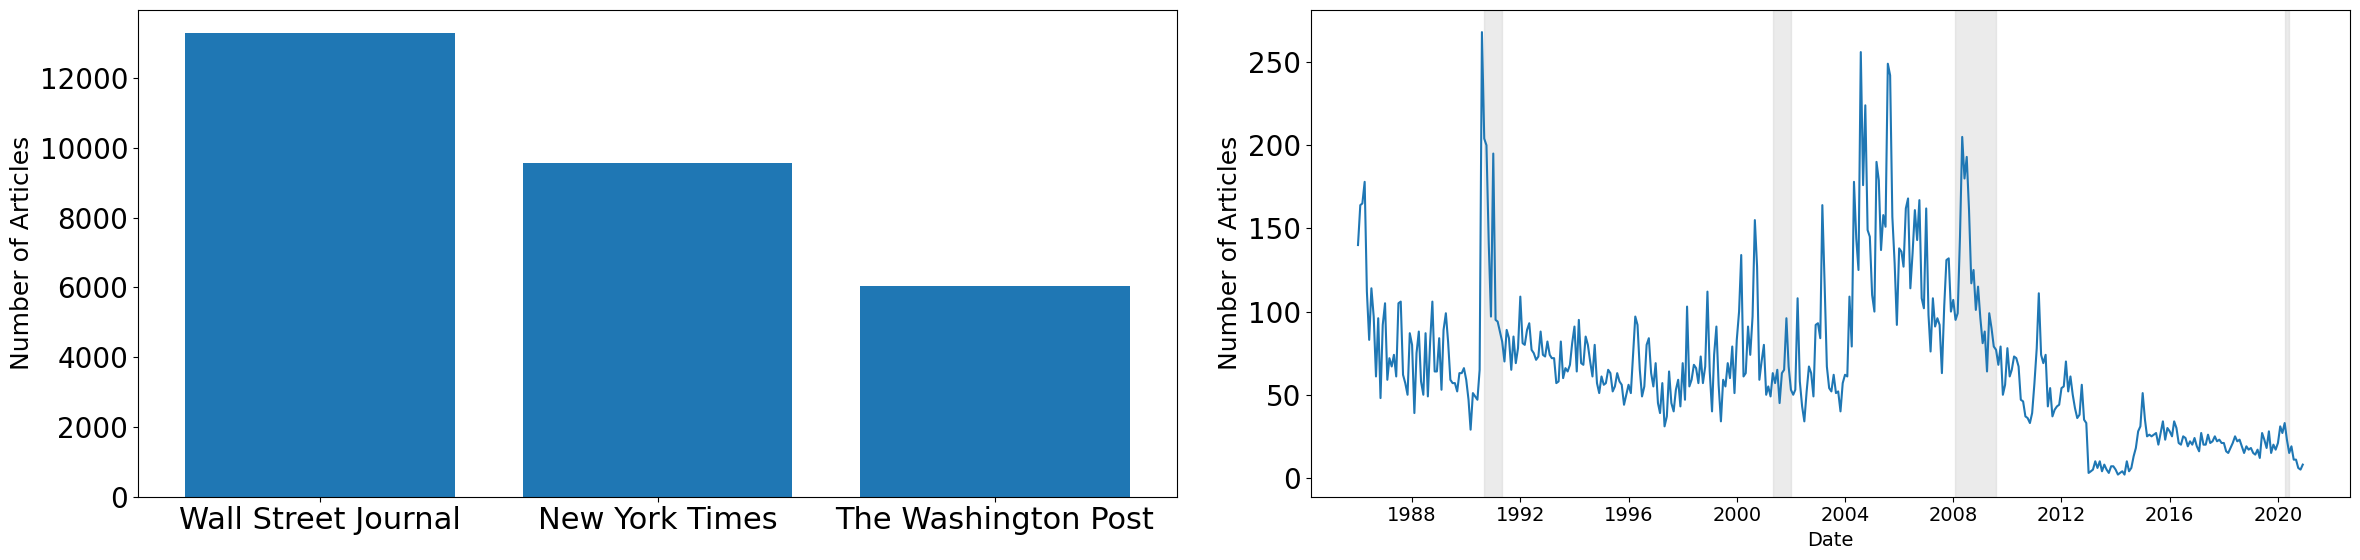

In [7]:
# Count the number of articles by Publication Title
articles_by_publication = data1['Publication Title'].value_counts()

data1['Date'] = pd.to_datetime(data1['Date'], errors='coerce')

# Extract month-year from 'Date' for grouping (assuming 'Date' is already a datetime column)
data1['Month-Year'] = data1['Date'].dt.to_period('M')

# Filtering the data from January 1986 to December 2020
filtered_data = data1[(data1['Date'] >= '1986-01-01') & (data1['Date'] <= '2020-12-31')]

# Count the number of articles per month-year
articles_per_month_year = filtered_data.groupby('Month-Year').size()

# Creating subplots
fig, axs = plt.subplots(1, 2, figsize=(24, 6))

# Plotting the top 10 publications
axs[0].bar(articles_by_publication[:10].index, articles_by_publication[:10].values)
axs[0].set_xlabel('')
axs[0].set_ylabel('Number of Articles', fontsize=18)
axs[0].tick_params(axis='x', rotation=360, labelsize=22)

# Plotting the number of articles published per month
axs[1].plot(articles_per_month_year.index.to_timestamp(), articles_per_month_year.values)

# Highlighting recession periods
for start, end in zip(recessions.index[recessions.diff() == 1], recessions.index[recessions.diff() == -1]):
    axs[1].axvspan(start, end, color='silver', alpha=0.3)

axs[1].set_xlabel('Date', fontsize=14)
axs[1].set_ylabel('Number of Articles', fontsize=18)
axs[1].tick_params(axis='x', rotation=360, labelsize=14)

plt.tight_layout()
fig.savefig("main results/Figure1.pdf", format="pdf", bbox_inches="tight", dpi=600)
print("Plot saved as 'main results/Figure1.pdf'")

C:\Users\gabeyie\AppData\Local\Temp\ipykernel_15516\992523604.py:15: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axes[0].legend()
C:\Users\gabeyie\AppData\Local\Temp\ipykernel_15516\992523604.py:20: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axes[1].legend()


Plot saved as 'main results/Figure2.pdf'
Plot saved as 'main results/Figure3.pdf'


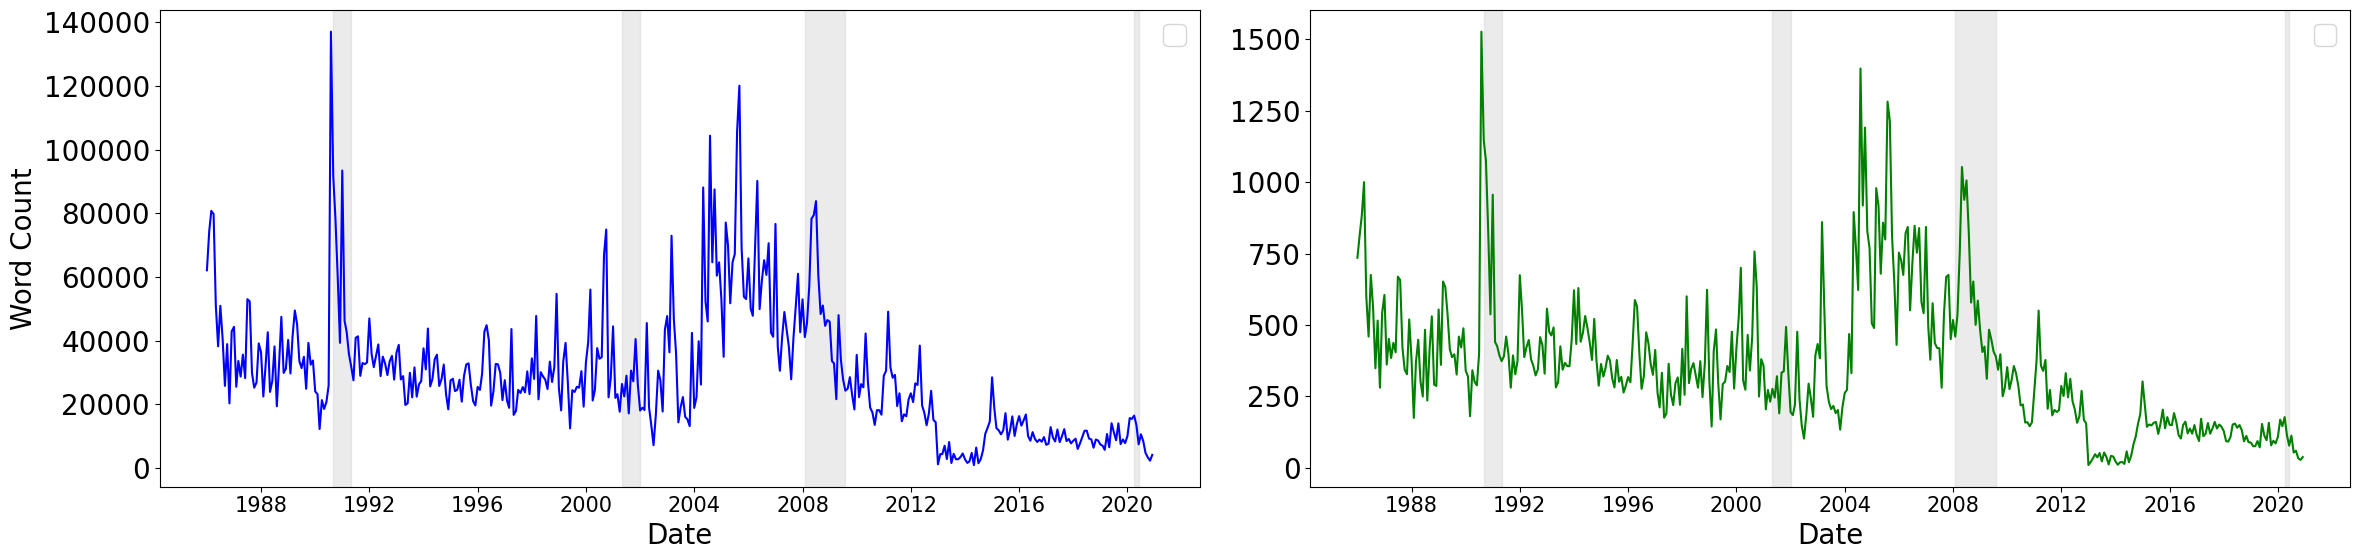

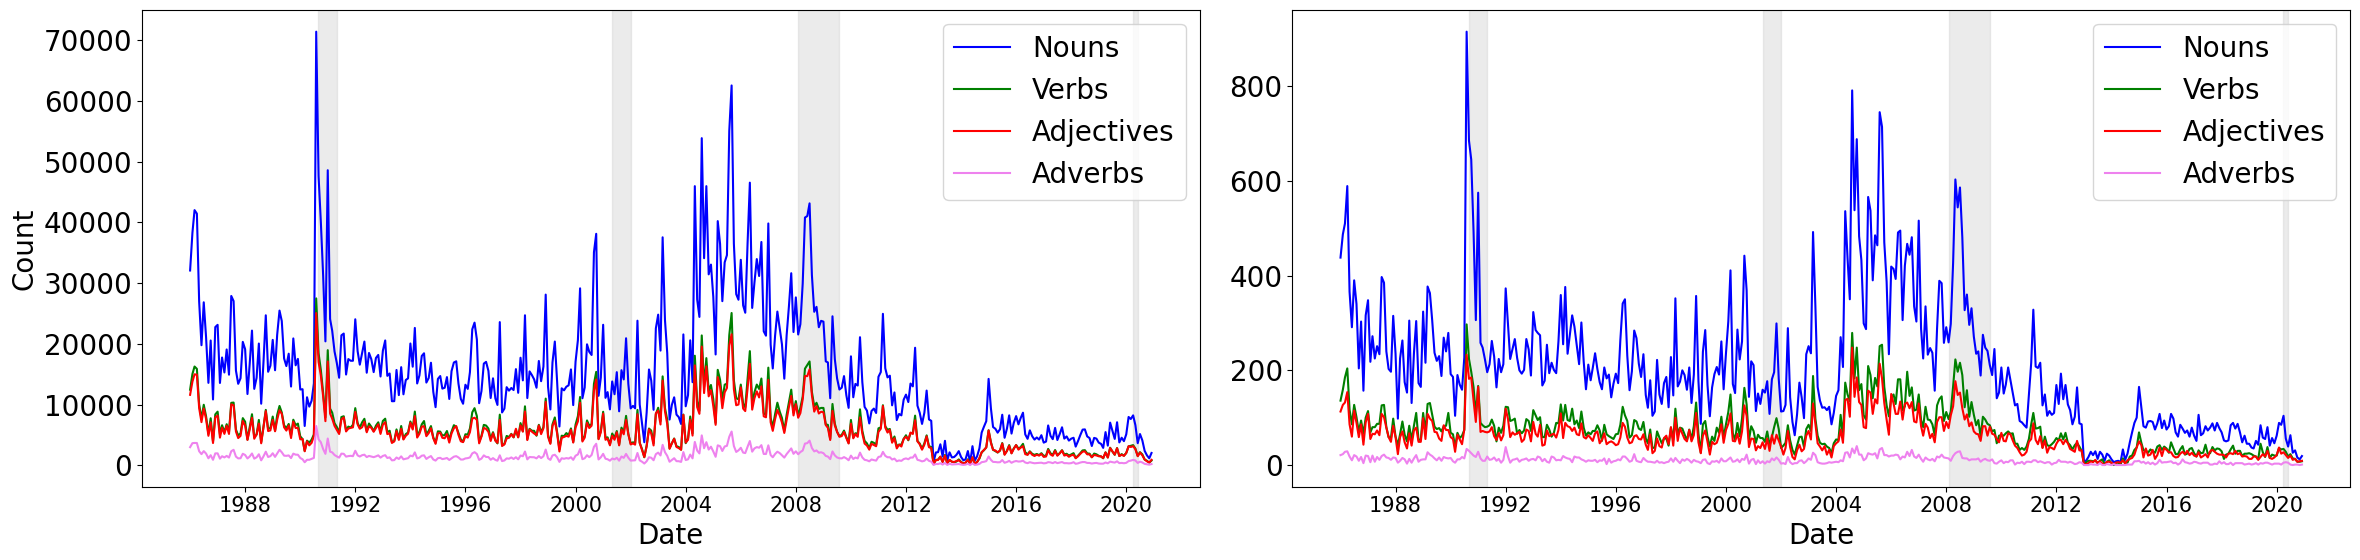

In [8]:
data.index = pd.to_datetime(data.index)

# Figure 1: Word counts for articles and headlines
fig, axes = plt.subplots(1, 2, figsize=(24, 6), sharey=False)

# Highlighting recession periods
for start, end in zip(recessions.index[recessions.diff() == 1], recessions.index[recessions.diff() == -1]):
    axes[0].axvspan(start, end, color='silver', alpha=0.3)
    axes[1].axvspan(start, end, color='silver', alpha=0.3)

# Left: Article word counts
axes[0].plot(data['Article_Word_Count'], color='blue')
axes[0].set_xlabel("Date")
axes[0].set_ylabel("Word Count")
axes[0].legend()

# Right: Headline word counts
axes[1].plot(data['Headline_Word_Count'], color='green')
axes[1].set_xlabel("Date")
axes[1].legend()

plt.tight_layout()
fig.savefig("main results/Figure2.pdf", format="pdf", bbox_inches="tight", dpi=600)
print("Plot saved as 'main results/Figure2.pdf'")

# Figure 2: POS counts for articles and headlines
fig, axes = plt.subplots(1, 2, figsize=(24, 6), sharey=False)

# Highlighting recession periods
for start, end in zip(recessions.index[recessions.diff() == 1], recessions.index[recessions.diff() == -1]):
    axes[0].axvspan(start, end, color='silver', alpha=0.3)
    axes[1].axvspan(start, end, color='silver', alpha=0.3)

# Left: POS counts for articles
axes[0].plot(data['Article_Nouns'], color='blue', label='Nouns')
axes[0].plot(data['Article_Verbs'], color='green', label='Verbs')
axes[0].plot(data['Article_Adjectives'], color='red', label='Adjectives')
axes[0].plot(data['Article_Adverbs'], color='violet', label='Adverbs')
axes[0].set_xlabel("Date")
axes[0].set_ylabel("Count")
axes[0].legend()

# Right: POS counts for headlines
axes[1].plot(data['Headline_Nouns'], color='blue', label='Nouns')
axes[1].plot(data['Headline_Verbs'], color='green', label='Verbs')
axes[1].plot(data['Headline_Adjectives'], color='red', label='Adjectives')
axes[1].plot(data['Headline_Adverbs'], color='violet', label='Adverbs')
axes[1].set_xlabel("Date")
axes[1].legend()

plt.tight_layout()
fig.savefig("main results/Figure3.pdf", format="pdf", bbox_inches="tight", dpi=600)
print("Plot saved as 'main results/Figure3.pdf'")

In [9]:
data_summary = {
    "Matrix": [
        "$D_{1,t}$",
        "$D_{2,t}$",
        "$D_{3,t}$",
        "$D_{4,t}$"
    ],
    "News Articles Dimensions": [
        f"{Article_train.shape[0] + Article_test.shape[0]} * {Article_train.shape[1]}",
        f"{Article_Noun_Noun_Adjective_Noun_train_combined.shape[0] + Article_Noun_Noun_Adjective_Noun_test_combined.shape[0]} * {Article_Noun_Noun_Adjective_Noun_train_combined.shape[1]}",
        f"{Article_Verb_Noun_Noun_Verb_train_combined.shape[0] + Article_Verb_Noun_Noun_Verb_test_combined.shape[0]} * {Article_Verb_Noun_Noun_Verb_train_combined.shape[1]}",
        f"{Article_Noun_Adjective_Verb_Adjective_train_combined.shape[0] + Article_Noun_Adjective_Verb_Adjective_test_combined.shape[0]} * {Article_Noun_Adjective_Verb_Adjective_train_combined.shape[1]}"
    ],
    "News Headlines Dimensions": [
        f"{Headline_train.shape[0] + Headline_test.shape[0]} * {Headline_train.shape[1]}",
        f"{Headline_Noun_Noun_Adjective_Noun_train_combined.shape[0] + Headline_Noun_Noun_Adjective_Noun_test_combined.shape[0]} * {Headline_Noun_Noun_Adjective_Noun_train_combined.shape[1]}",
        f"{Headline_Verb_Noun_Noun_Verb_train_combined.shape[0] + Headline_Verb_Noun_Noun_Verb_test_combined.shape[0]} * {Headline_Verb_Noun_Noun_Verb_train_combined.shape[1]}",
        f"{Headline_Noun_Adjective_Verb_Adjective_train_combined.shape[0] + Headline_Noun_Adjective_Verb_Adjective_test_combined.shape[0]} * {Headline_Noun_Adjective_Verb_Adjective_train_combined.shape[1]}"
    ]
}
summary_df = pd.DataFrame(data_summary)
summary_df.to_csv(os.path.join(results_folder, "Table4_5_6.csv"), index=False)

Plot saved as 'main results/Figure5.pdf'


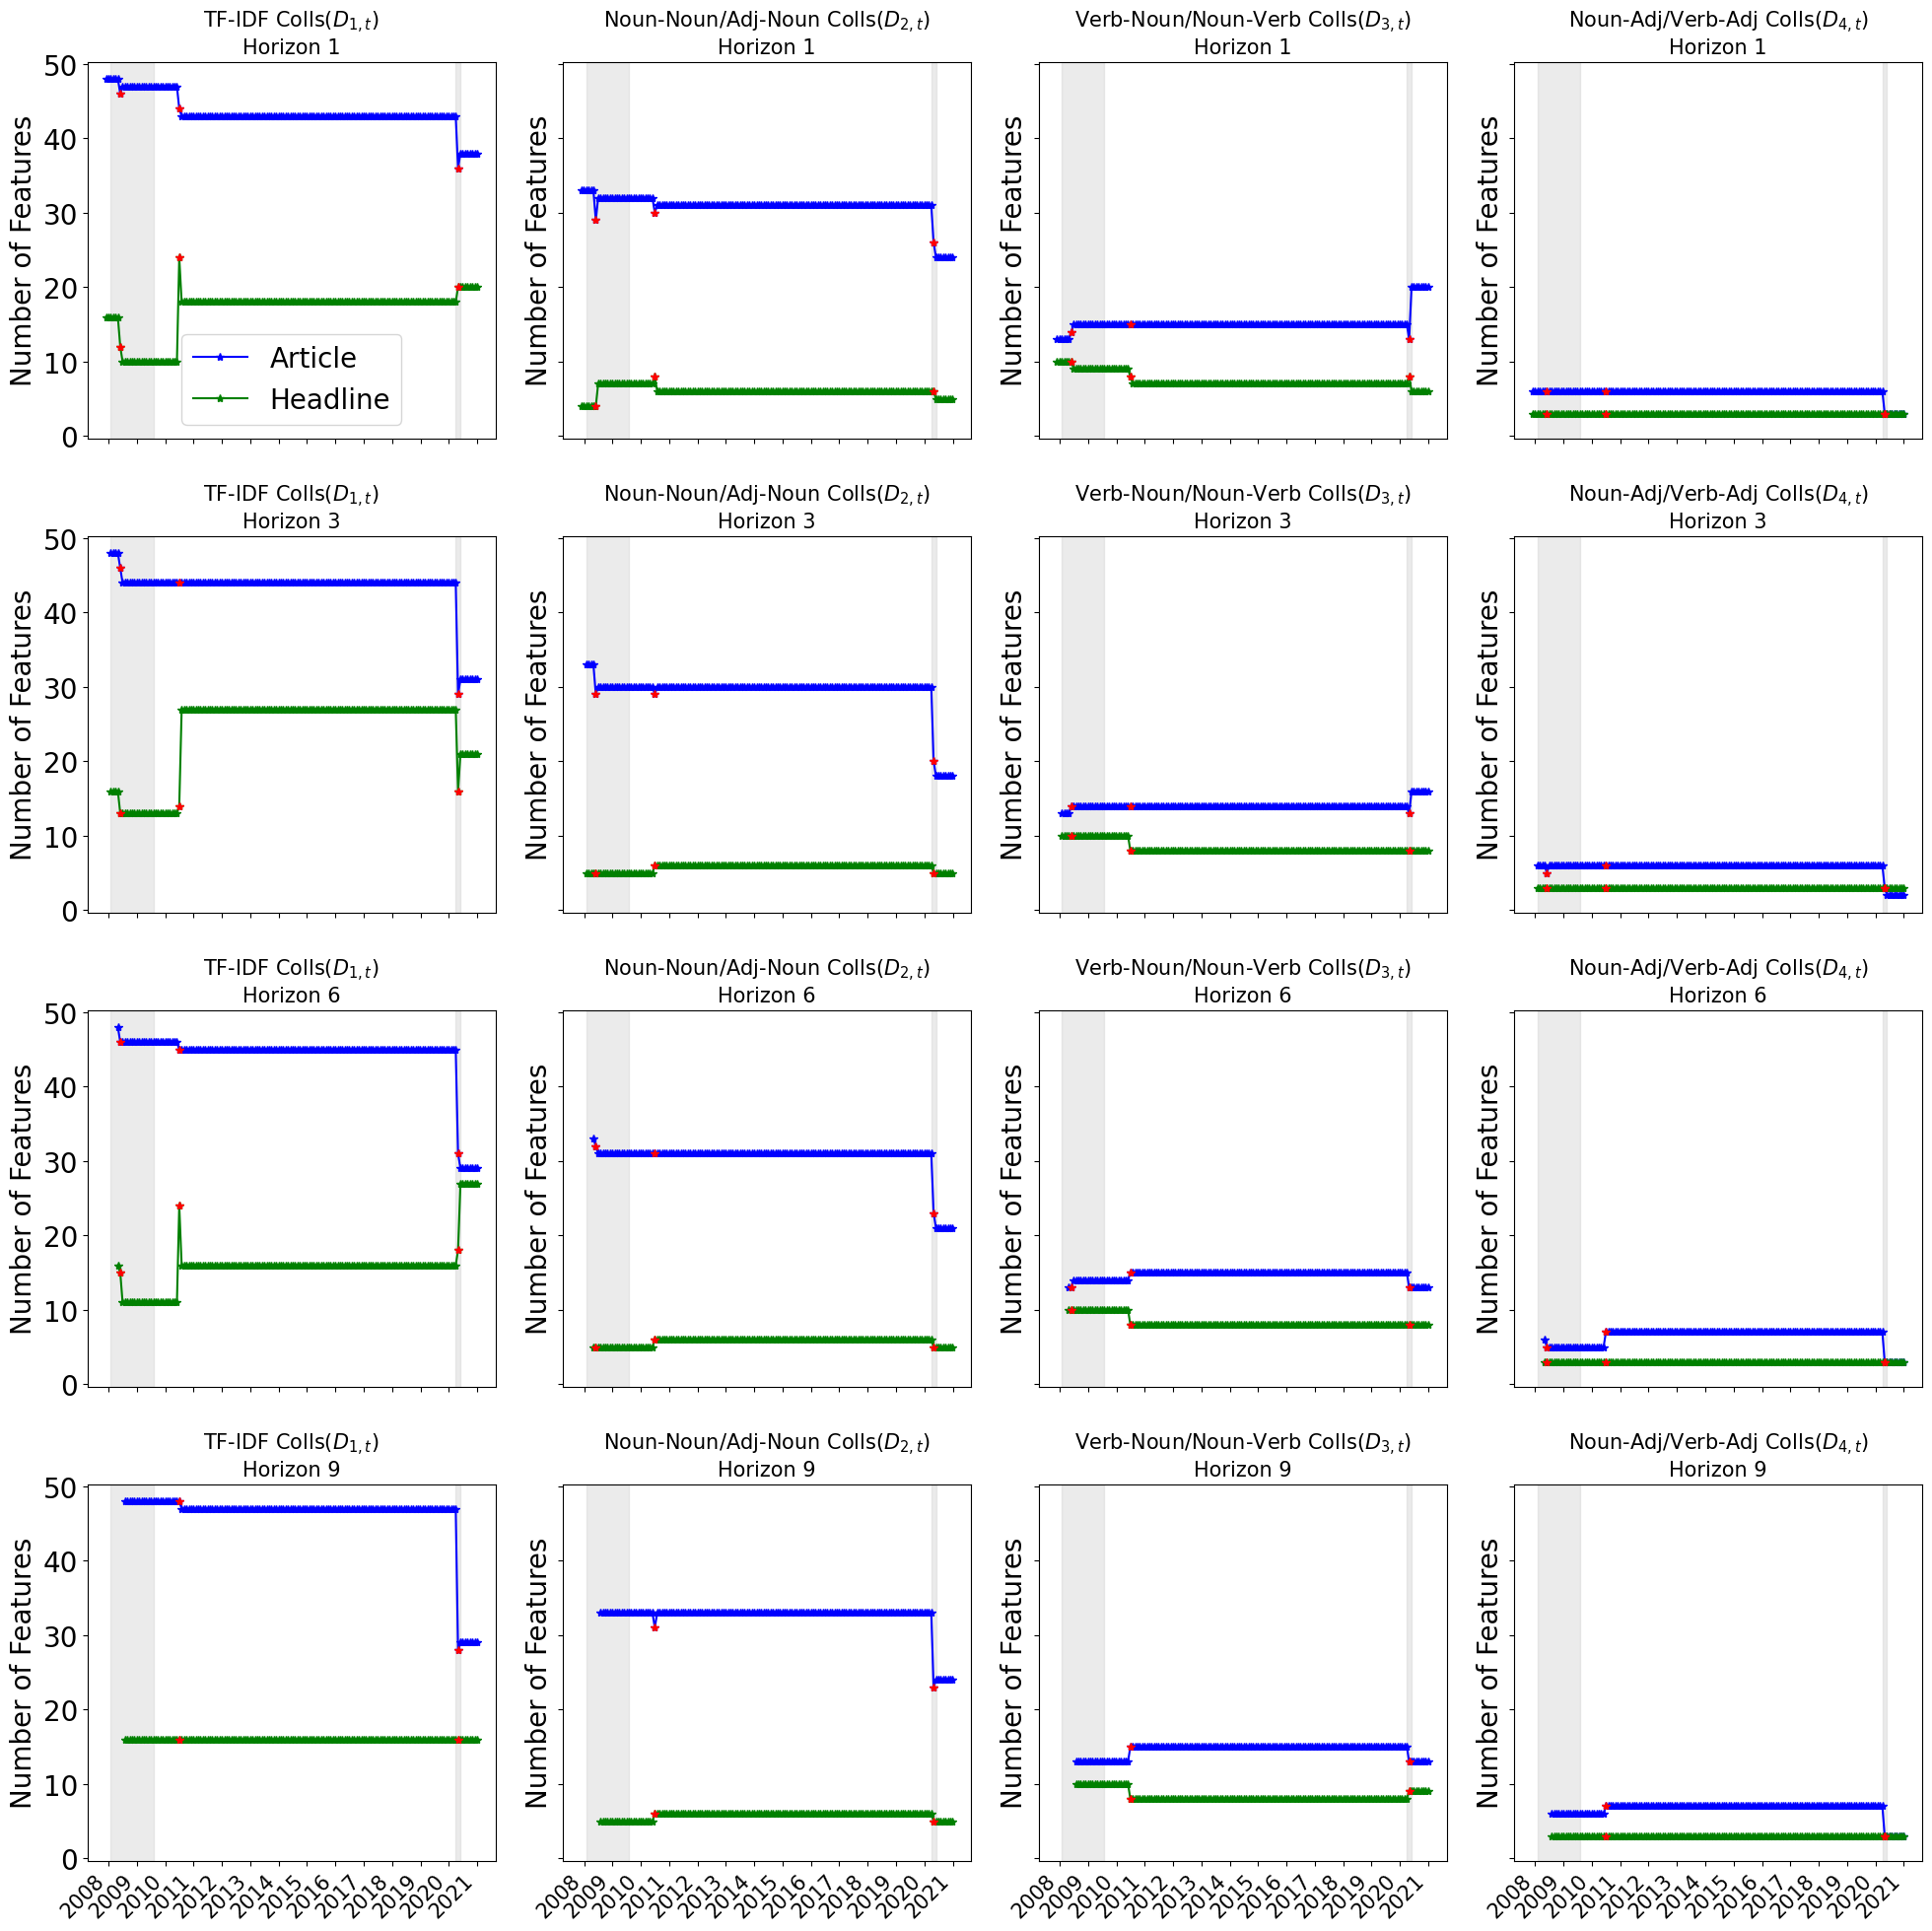

In [10]:
dates = test_dates
n_models_articles = len(Sahm_Rule_Article_top_features_per_model.keys())
n_models_headlines = len(Sahm_Rule_Headline_top_features_per_model.keys())
n_horizons = len(horizons)

fig, axs = plt.subplots(n_horizons, n_models_articles, figsize=(5 * n_models_articles, 5 * n_horizons), sharex=True, sharey=True)

if n_horizons * n_models_articles == 1:
    axs = np.array([axs])

axs = axs.ravel()

for model_idx, (model_name, _) in enumerate(Sahm_Rule_Article_top_features_per_model.items()):
    for horizon_idx, horizon in enumerate(horizons):
        ax = axs[n_models_articles * horizon_idx + model_idx]
        
        # Fetch Article and Headline feature counts for the current model and horizon
        article_feature_counts = Sahm_Rule_Article_elasticnet_feature_counts[model_name][horizon]
        headline_feature_counts = Sahm_Rule_Headline_elasticnet_feature_counts[model_name][horizon]
        
        # Adjusted dates to match the feature count length
        adjusted_test_dates = test_dates[(horizon - 1):]
        adjusted_article_feature_counts = article_feature_counts[-len(adjusted_test_dates):]
        adjusted_headline_feature_counts = headline_feature_counts[-len(adjusted_test_dates):]
        adjusted_update_indicator = update[(horizon - 1):].values[-len(adjusted_test_dates):]

        # Plot the feature counts for Articles in blue
        ax.plot(adjusted_test_dates, adjusted_article_feature_counts, marker='*', linestyle='-', color='blue', label='Article')
        
        # Plot the feature counts for Headlines in green
        ax.plot(adjusted_test_dates, adjusted_headline_feature_counts, marker='*', linestyle='-', color='green', label='Headline')

        # Plot red markers where updates occur for Articles
        for date, update_indicator in zip(adjusted_test_dates, adjusted_update_indicator):
            if update_indicator:  # if the indicator is True, mark the update point for Articles
                ax.plot(date, adjusted_article_feature_counts[adjusted_test_dates.tolist().index(date)], 'r*')
        
        # Plot red markers where updates occur for Headlines
        for date, update_indicator in zip(adjusted_test_dates, adjusted_update_indicator):
            if update_indicator:  # if the indicator is True, mark the update point for Headlines
                ax.plot(date, adjusted_headline_feature_counts[adjusted_test_dates.tolist().index(date)], 'r*')

        ax.set_title(f'{model_name}\nHorizon {horizon}', fontsize=15)
        
        # Optional: Set the x-axis to show dates instead of intervals
        ax.xaxis.set_major_locator(mdates.YearLocator())
        ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

        # Fill the recession periods
        for start, end in zip(recessions.index[recessions.diff() == 1], recessions.index[recessions.diff() == -1]):
            if start in test_dates.values and end in test_dates.values:
                ax.axvspan(start, end, color='silver', alpha=0.3)

        # Rotate date labels for better readability
        plt.setp(ax.get_xticklabels(), rotation=45, ha='right')
        
        ax.set_ylabel('Number of Features', fontsize=20)
        
        # Optional: Add legend only in the first subplot of each column
        if horizon_idx == 0 and model_idx == 0:
            ax.legend()

plt.subplots_adjust(bottom=0.2, top=0.9, left=0.1, right=0.9, hspace=0.4, wspace=0.4)
plt.tight_layout()
fig.savefig("main results/Figure5.pdf", format="pdf", bbox_inches="tight", dpi=600)
print("Plot saved as 'main results/Figure5.pdf'")

Plot saved as 'main results/Figure6.pdf'


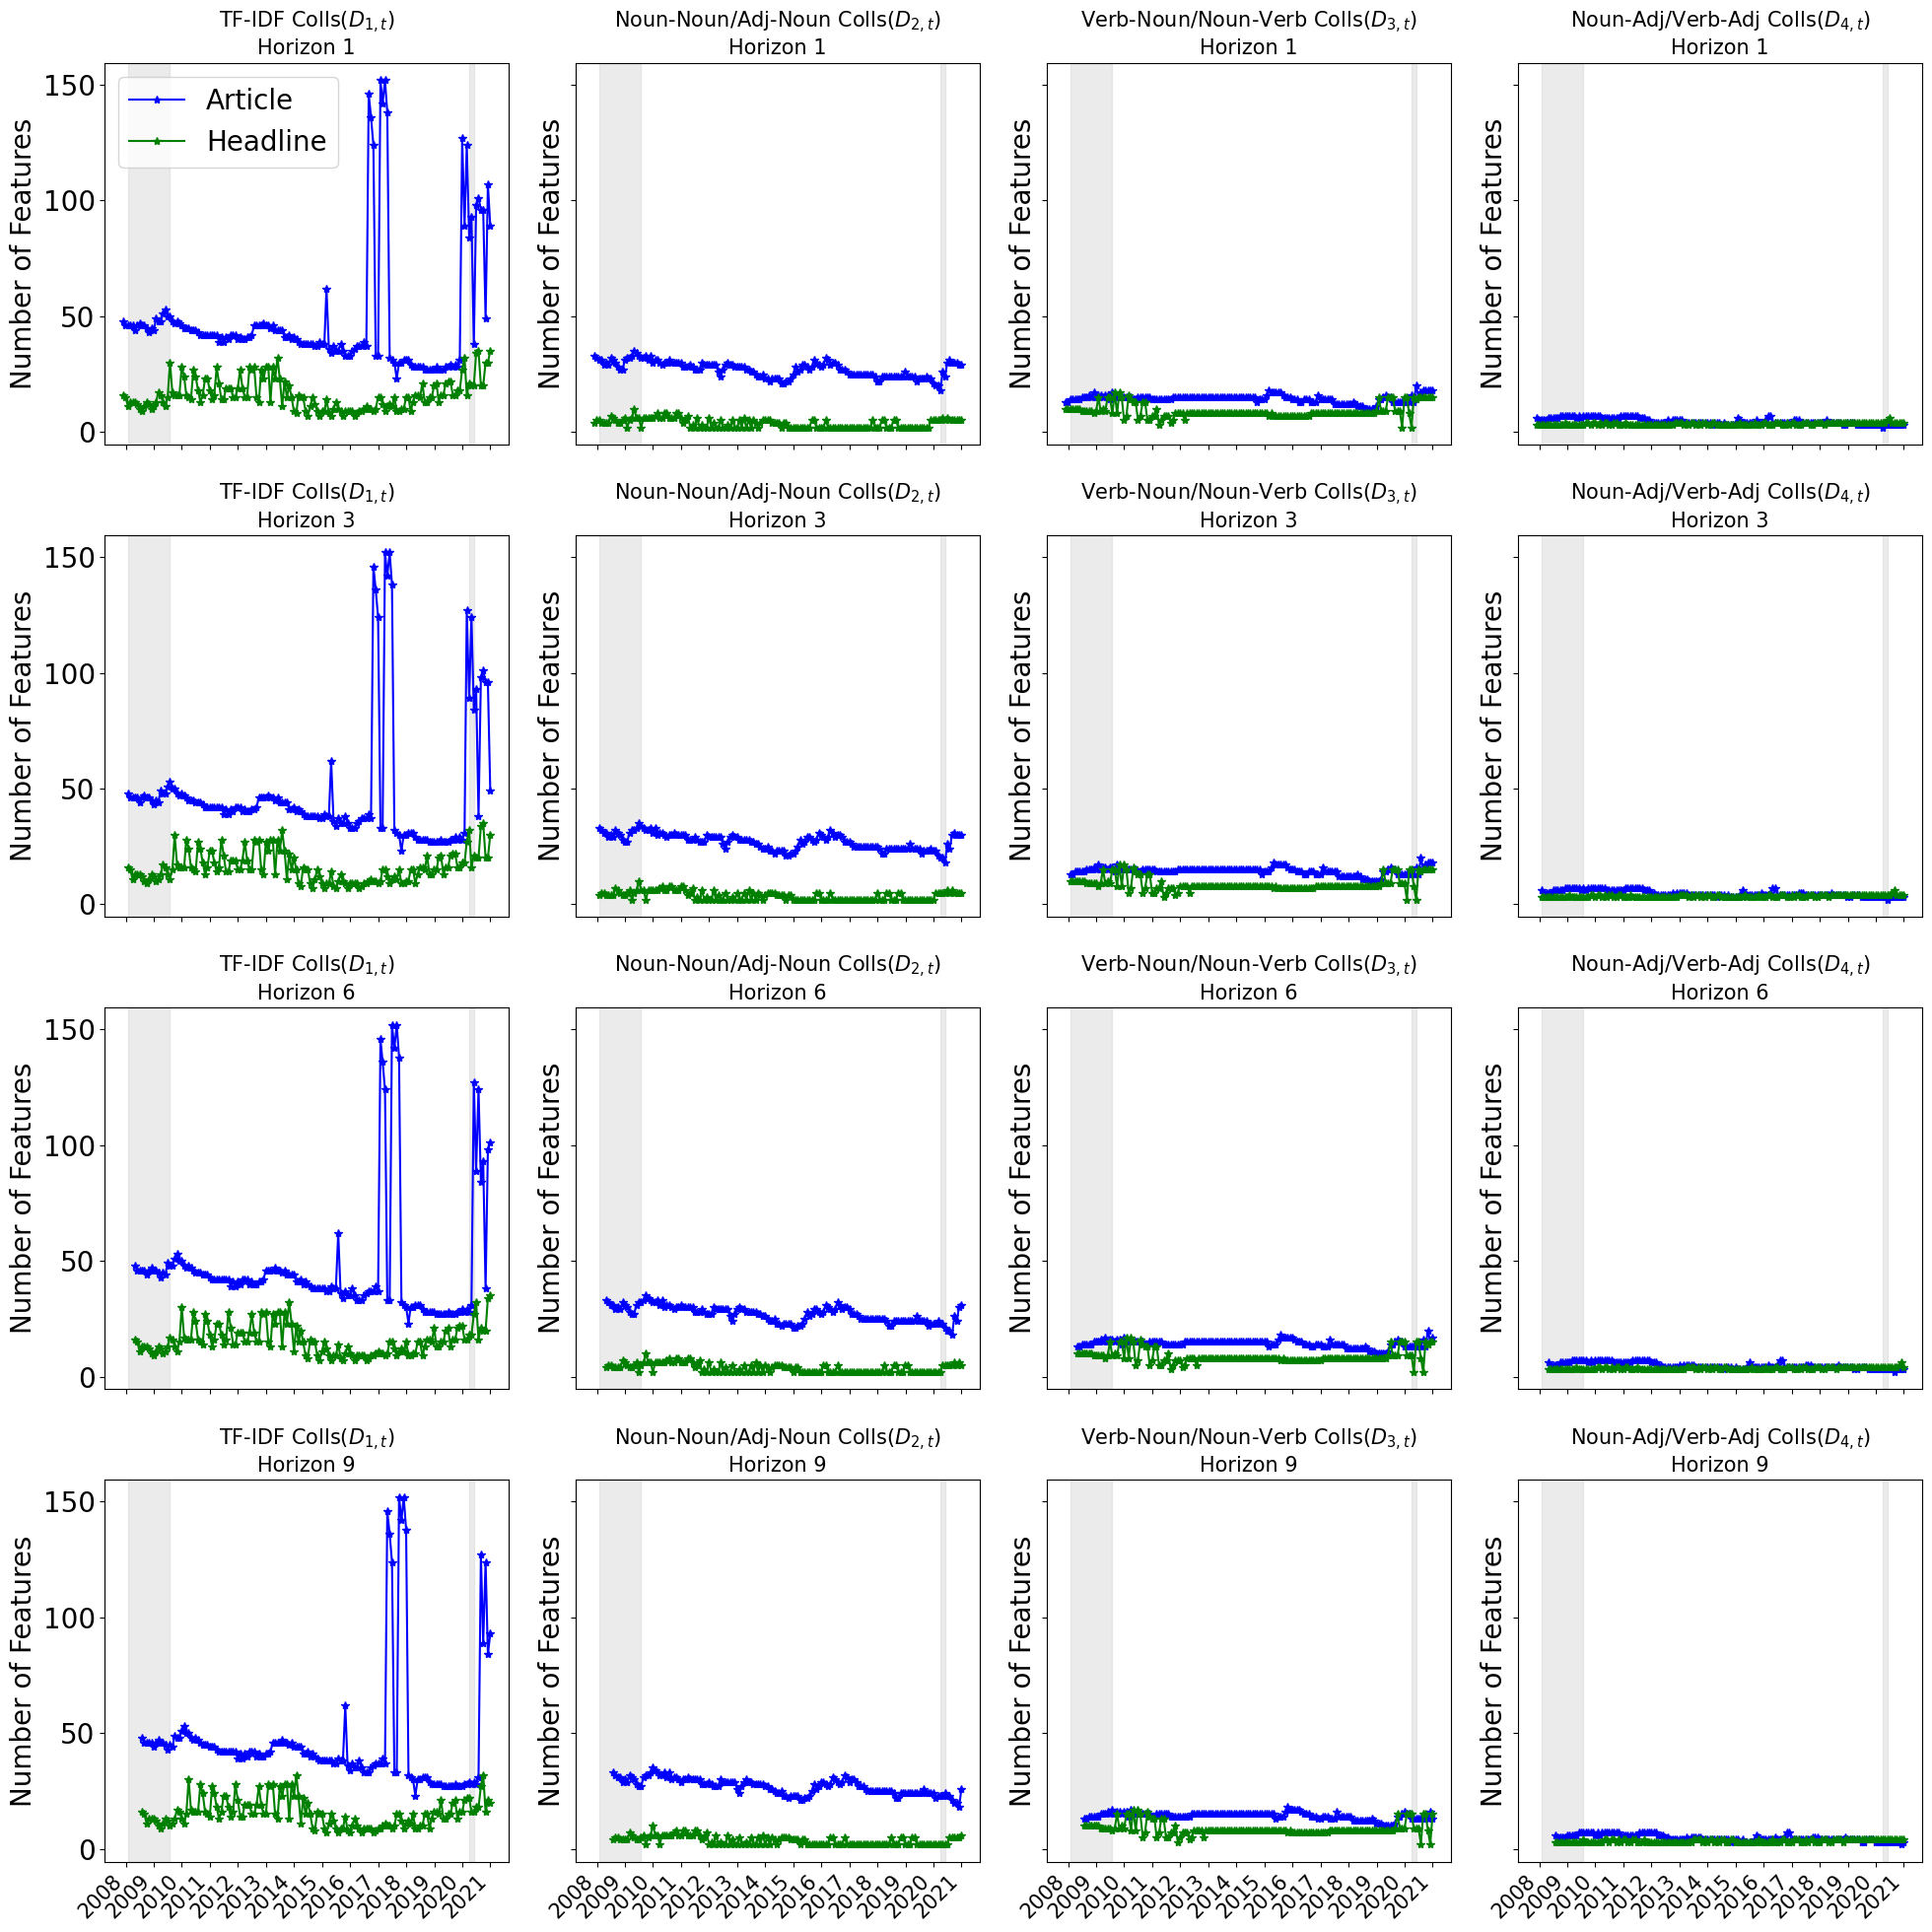

In [11]:
n_models_articles = len(Continuous_Article_top_features_per_model.keys())
n_models_headlines = len(Continuous_Headline_top_features_per_model.keys())
n_horizons = len(horizons)

# Create a combined plot grid (one row for each horizon, columns for each model)
fig, axs = plt.subplots(n_horizons, n_models_articles, figsize=(5 * n_models_articles, 5 * n_horizons), sharex=True, sharey=True)

# If there's only one row or column, axs may not be a 2D array
if n_horizons * n_models_articles == 1:
    axs = np.array([axs])

# Flatten the array for easy iteration if necessary
axs = axs.ravel()

# Loop through each model and horizon to populate the subplot
for model_idx, (model_name, _) in enumerate(Continuous_Article_top_features_per_model.items()):
    for horizon_idx, horizon in enumerate(horizons):
        ax = axs[n_models_articles * horizon_idx + model_idx]
        
        # Fetch Article and Headline feature counts for the current model and horizon
        article_feature_counts = Continuous_Article_elasticnet_feature_counts[model_name][horizon]
        headline_feature_counts = Continuous_Headline_elasticnet_feature_counts[model_name][horizon]
        
        # Adjusted dates to match the feature count length
        adjusted_test_dates = test_dates[(horizon - 1):]
        adjusted_article_feature_counts = article_feature_counts[-len(adjusted_test_dates):]
        adjusted_headline_feature_counts = headline_feature_counts[-len(adjusted_test_dates):]

        # Plot the feature counts for Articles in blue
        ax.plot(adjusted_test_dates, adjusted_article_feature_counts, marker='*', linestyle='-', color='blue', label='Article')
        
        # Plot the feature counts for Headlines in green
        ax.plot(adjusted_test_dates, adjusted_headline_feature_counts, marker='*', linestyle='-', color='green', label='Headline')

        ax.set_title(f'{model_name}\nHorizon {horizon}', fontsize=15)
        
        # Optional: Set the x-axis to show dates instead of intervals
        ax.xaxis.set_major_locator(mdates.YearLocator())
        ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

        # Fill the recession periods
        for start, end in zip(recessions.index[recessions.diff() == 1], recessions.index[recessions.diff() == -1]):
            if start in test_dates.values and end in test_dates.values:
                ax.axvspan(start, end, color='silver', alpha=0.3)

        # Rotate date labels for better readability
        plt.setp(ax.get_xticklabels(), rotation=45, ha='right')
        
        ax.set_ylabel('Number of Features', fontsize=20)
        
        # Optional: Add legend only in the first subplot of each column
        if horizon_idx == 0 and model_idx == 0:
            ax.legend()

plt.subplots_adjust(bottom=0.2, top=0.9, left=0.1, right=0.9, hspace=0.4, wspace=0.4)
plt.tight_layout()
fig.savefig("main results/Figure6.pdf", format="pdf", bbox_inches="tight", dpi=600)
print("Plot saved as 'main results/Figure6.pdf'")

In [12]:
data = {
    'Model': [],
    'Type': [],
    'Horizon 1': [],
    'Horizon 3': [],
    'Horizon 6': [],
    'Horizon 9': []
}
for model_name, horizons_data in Sahm_Rule_Article_pca_components_counts.items():
    data['Model'].append(model_name)
    data['Type'].append('Article-Sahm Rule')
    for horizon in horizons:
        components_counts = horizons_data.get(horizon, [])
        avg_components = sum(components_counts) / len(components_counts) if components_counts else 0
        data[f'Horizon {horizon}'].append(round(avg_components, 2))
for model_name, horizons_data in Sahm_Rule_Headline_pca_components_counts.items():
    data['Model'].append(model_name)
    data['Type'].append('Headline-Sahm Rule')
    for horizon in horizons:
        components_counts = horizons_data.get(horizon, [])
        avg_components = sum(components_counts) / len(components_counts) if components_counts else 0
        data[f'Horizon {horizon}'].append(round(avg_components, 2))
for model_name, horizons_data in Continuous_Article_pca_components_counts.items():
    data['Model'].append(model_name)
    data['Type'].append('Article-Continuous')
    for horizon in horizons:
        components_counts = horizons_data.get(horizon, [])
        avg_components = sum(components_counts) / len(components_counts) if components_counts else 0
        data[f'Horizon {horizon}'].append(round(avg_components, 2))
for model_name, horizons_data in Continuous_Headline_pca_components_counts.items():
    data['Model'].append(model_name)
    data['Type'].append('Headline-Continuous')
    for horizon in horizons:
        components_counts = horizons_data.get(horizon, [])
        avg_components = sum(components_counts) / len(components_counts) if components_counts else 0
        data[f'Horizon {horizon}'].append(round(avg_components, 2))
df = pd.DataFrame(data)
df.to_csv(os.path.join(results_folder, "Table7.csv"), index=False)

C:\Users\gabeyie\AppData\Local\Temp\ipykernel_15516\3054396515.py:14: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


Plot saved as 'main results/Figure7.pdf'


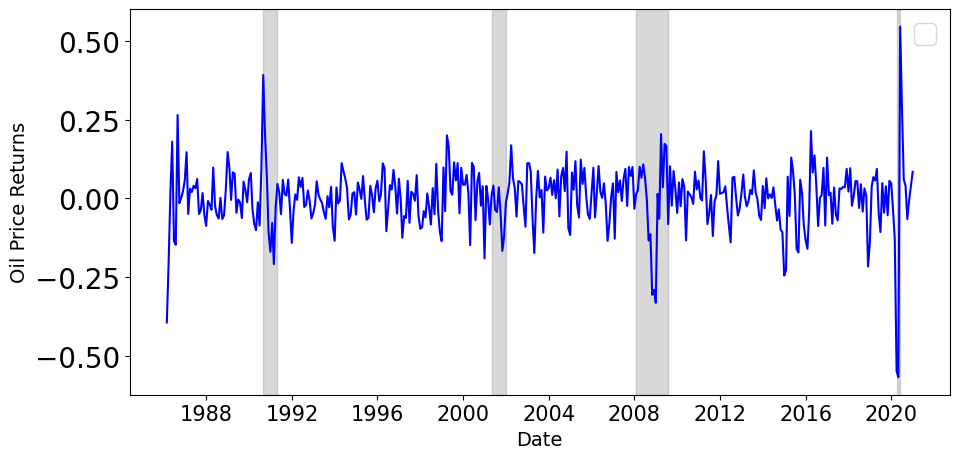

In [13]:
data_cleaned = Target.dropna()
data_cleaned.index = pd.to_datetime(data_cleaned.index) 

# Plot the variable
plt.figure(figsize=(10, 5))
plt.plot(data_cleaned, color='blue')

for start, end in zip(recessions.index[recessions.diff() == 1], recessions.index[recessions.diff() == -1]):
    plt.axvspan(start, end, color='gray', alpha=0.3)

plt.xlabel("Date", fontsize=14)
plt.ylabel("Oil Price Returns", fontsize=14)
plt.grid(False)
plt.legend()
plt.tight_layout()
fig.savefig("main results/Figure7.pdf", format="pdf", bbox_inches="tight", dpi=600)
print("Plot saved as 'main results/Figure7.pdf'")

In [14]:
# Define functions for repeated calculations
def calculate_r2_oos(y_true, y_pred, y_benchmark):
    mspe_model = np.mean((y_true - y_pred)**2)
    mspe_benchmark = np.mean((y_true - y_benchmark)**2)
    return (1 - (mspe_model / mspe_benchmark)) * 100

def calculate_rrmsfe(y_true, y_pred, y_benchmark):
    msfe_model = np.mean((y_true - y_pred)**2)
    msfe_benchmark = np.mean((y_true - y_benchmark)**2)
    return np.sqrt(msfe_model / msfe_benchmark)

def perform_cw_test(y_true, y_pred, y_benchmark):
    error_diff = (y_true - y_benchmark)**2 - (y_true - y_pred)**2 + (y_pred - y_benchmark)**2
    return stats.ttest_1samp(error_diff, 0, alternative='greater')

# Initialize dictionaries using defaultdict
r2_oos_dict = defaultdict(lambda: defaultdict(float))
rrmsfe_dict = defaultdict(lambda: defaultdict(float))
cw_test_results_dict = defaultdict(lambda: defaultdict(tuple))

# Define a function to handle all calculations and store results in a DataFrame
def process_predictions(predictions, model_name_prefix, benchmark):
    # Create a dictionary to hold results
    results = defaultdict(list)

    for model_name in predictions.keys():
        # Initialize lists for each horizon's metrics
        r2_oos_values = []
        rrmsfe_values = []
        cw_stat_values = []
        p_value_values = []

        for h in horizons:
            # Extract data
            y_true = np.array(True_values[model_name][h])
            y_pred = np.array(predictions[model_name][h])
            y_benchmark = np.array(benchmark[model_name][h])  # Use the selected benchmark

            # Calculate R-squared out-of-sample
            r2_oos = calculate_r2_oos(y_true, y_pred, y_benchmark)
            r2_oos_values.append(f"{r2_oos:.2f}")  # 2 decimal places
            
            # Calculate RRMSFE
            rrmsfe = calculate_rrmsfe(y_true, y_pred, y_benchmark)
            rrmsfe_values.append(f"{rrmsfe:.3f}")  # 3 decimal places
            
            # Perform Clark-West test
            cw_stat, p_value = perform_cw_test(y_true, y_pred, y_benchmark)
            cw_stat_values.append(f"{cw_stat:.3f}")  # 3 decimal places
            
            # Format p-value with stars
            if p_value < 0.01:
                p_value_values.append(f"{p_value:.3f} ***")  # 3 stars
            elif p_value < 0.05:
                p_value_values.append(f"{p_value:.3f} **")  # 2 stars
            elif p_value < 0.1:
                p_value_values.append(f"{p_value:.3f} *")  # 1 star
            else:
                p_value_values.append(f"{p_value:.3f}")  # No stars

        # Add results for this model to the dictionary, using the horizon as part of the column name
        results['Model'].append(model_name)
        results['Source'].append(model_name_prefix)

        for i, h in enumerate(horizons):
            results[f'R2_OOS_Horizon{h}'].append(r2_oos_values[i])
            results[f'RRMSFE_Horizon{h}'].append(rrmsfe_values[i])
            results[f'CW_Horizon{h}'].append(cw_stat_values[i])
            results[f'P_Value_Horizon{h}'].append(p_value_values[i])

    # Convert the results dictionary into a pandas DataFrame
    df = pd.DataFrame(results)

    # Return the DataFrame for later use
    return df

# Specify the benchmark you want to use
selected_benchmark = Benchmark_model_1
alternative_benchmark = Benchmark_model_2

# Initialize an empty list to store DataFrames
all_results = []
fred_results = []
robust_results = []

# Process all prediction sets and store the DataFrames
all_results.append(process_predictions(Sahm_Rule_Article_predictions, "Sahm Rule Article", selected_benchmark))
all_results.append(process_predictions(Sahm_Rule_Headline_predictions, "Sahm Rule Headline", selected_benchmark))
all_results.append(process_predictions(Continuous_Article_predictions, "Continuous Article", selected_benchmark))
all_results.append(process_predictions(Continuous_Headline_predictions, "Continuous Headline", selected_benchmark))

fred_results.append(process_predictions(Sahm_Rule_FredMD_predictions, "Sahm Rule FRED-MD", selected_benchmark))
fred_results.append(process_predictions(Sahm_Rule_FREDMD_plus_Text_predictions, "Sahm Rule FRED-MD/Text", selected_benchmark))
fred_results.append(process_predictions(Continuous_FredMD_predictions, "Sahm Rule FRED-MD", selected_benchmark))
fred_results.append(process_predictions(Continuous_FREDMD_plus_Text_predictions, "Sahm Rule FRED-MD/Text", selected_benchmark))

robust_results.append(process_predictions(Sahm_Rule_Article_predictions, "Sahm Rule Article", alternative_benchmark))
robust_results.append(process_predictions(Sahm_Rule_Headline_predictions, "Sahm Rule Headline", alternative_benchmark))
robust_results.append(process_predictions(Continuous_Article_predictions, "Continuous Article", alternative_benchmark))
robust_results.append(process_predictions(Continuous_Headline_predictions, "Continuous Headline", alternative_benchmark))

# Combine all DataFrames into one
complete_results_df = pd.concat(all_results, ignore_index=True)
fred_results_df = pd.concat(fred_results, ignore_index=True)
robust_results_df = pd.concat(robust_results, ignore_index=True)

# Save the complete table to a CSV file
complete_results_df.to_csv(os.path.join(results_folder, "Table8.csv"), index=False)
fred_results_df.to_csv(os.path.join(results_folder, "Table10.csv"), index=False)
robust_results_df.to_csv(os.path.join(results_folder, "Table11.csv"), index=False)

Plot saved as 'main results/Figure8.pdf'


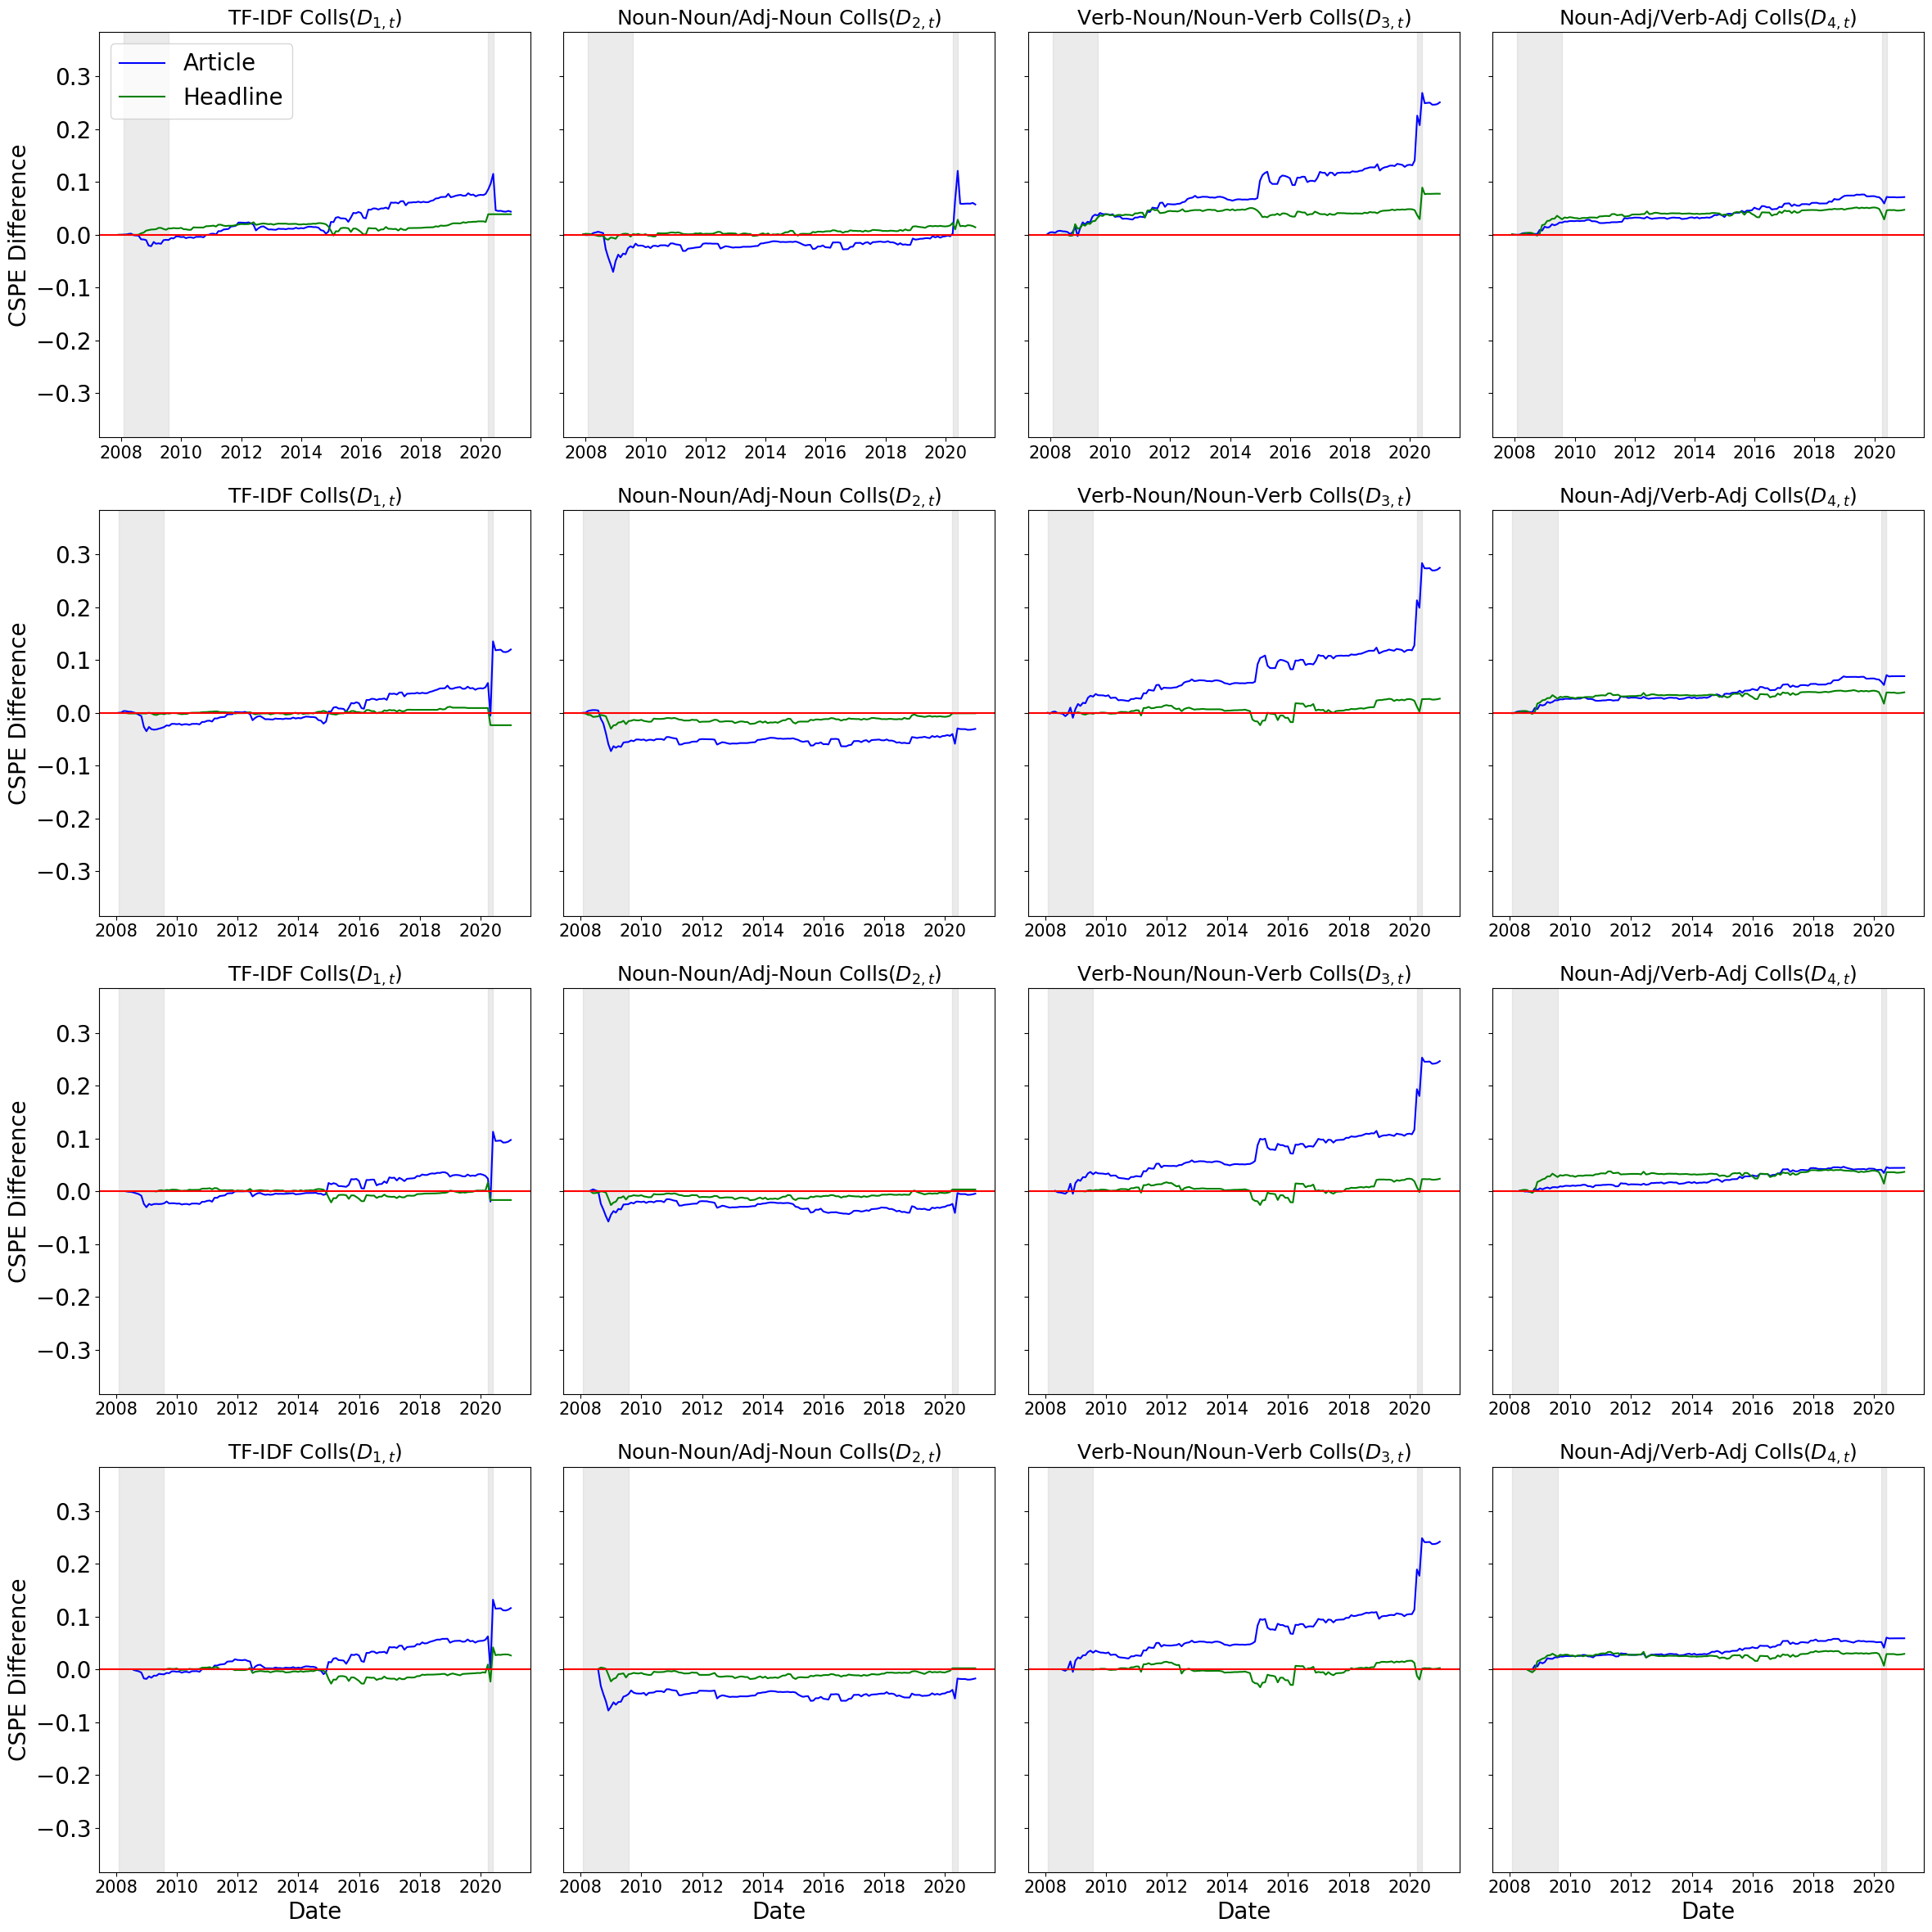

In [15]:
dates = test_dates
models = list(Sahm_Rule_Article_predictions.keys())
n_horizons = len(horizons)
n_models = len(models)

# Create a grid of subplots: n_horizons rows and n_models columns
fig, axs = plt.subplots(n_horizons, n_models, figsize=(6*n_models, 6*n_horizons), sharey=True)

# Check if axs is a single object, which happens when n_horizons or n_models is 1
if not isinstance(axs, np.ndarray):
    axs = np.array([axs])

# Flatten array to easily iterate over it in a single loop
axs = axs.ravel()

# Calculate global y-axis limits
global_y_min = 0
global_y_max = 0

# Pre-calculate all y-values for determining global y-limits (from both Article and Headline)
for h in horizons:
    for model_name in models:
        # For Article predictions
        y_benchmark = np.array(Benchmark_model_1[model_name][h])
        y_true = np.array(True_values[model_name][h])
        y_pred_article = np.array(Sahm_Rule_Article_predictions[model_name][h])
        e1_article = (y_true - y_pred_article) ** 2
        e2_article = (y_true - y_benchmark) ** 2
        y_values_article = np.cumsum(e2_article) - np.cumsum(e1_article)
        
        # For Headline predictions
        y_pred_headline = np.array(Sahm_Rule_Headline_predictions[model_name][h])
        e1_headline = (y_true - y_pred_headline) ** 2
        e2_headline = (y_true - y_benchmark) ** 2
        y_values_headline = np.cumsum(e2_headline) - np.cumsum(e1_headline)

        global_y_min = min(global_y_min, y_values_article.min(), y_values_headline.min())
        global_y_max = max(global_y_max, y_values_article.max(), y_values_headline.max())

# Adjust y-limits slightly for visual clarity
y_abs_max = max(abs(global_y_min), abs(global_y_max))
global_y_limits = (-y_abs_max-0.1, y_abs_max+0.1)

# Loop to plot both Article and Headline data in the same subplot
for h_idx, h in enumerate(horizons):
    for m_idx, model_name in enumerate(models):
        ax_idx = n_models * h_idx + m_idx
        ax = axs[ax_idx]

        # For Article (blue line)
        y_benchmark = np.array(Benchmark_model_1[model_name][h])
        y_true = np.array(True_values[model_name][h])
        y_pred_article = np.array(Sahm_Rule_Article_predictions[model_name][h])
        e1_article = (y_true - y_pred_article) ** 2
        e2_article = (y_true - y_benchmark) ** 2
        y_values_article = np.cumsum(e2_article) - np.cumsum(e1_article)

        # For Headline (green line)
        y_pred_headline = np.array(Sahm_Rule_Headline_predictions[model_name][h])
        e1_headline = (y_true - y_pred_headline) ** 2
        e2_headline = (y_true - y_benchmark) ** 2
        y_values_headline = np.cumsum(e2_headline) - np.cumsum(e1_headline)

        # Adjust dates based on the horizon
        adjusted_dates = dates[(h-1):]

        # Plot both Article and Headline on the same axes
        ax.plot(adjusted_dates, y_values_article, color='blue')
        ax.plot(adjusted_dates, y_values_headline, color='green')

        # Highlight recession periods dynamically
        for start, end in zip(recessions.index[recessions.diff() == 1], recessions.index[recessions.diff() == -1]):
            if start in dates and end in dates:
                ax.axvspan(start, end, color='silver', alpha=0.3)

        ax.axhline(0, color='red', linestyle='-')
        ax.set_ylim(global_y_limits)
        ax.set_title(model_name, fontsize = 18)
        if h_idx == n_horizons - 1:
            ax.set_xlabel('Date', fontsize = 20)
        if m_idx == 0:
            ax.set_ylabel('CSPE Difference', fontsize = 20)

        # Add legend only to the very first plot (first subplot in the grid)
        if h_idx == 0 and m_idx == 0:
            ax.legend(['Article', 'Headline'], loc='upper left')

plt.tight_layout()
fig.savefig("main results/Figure8.pdf", format="pdf", bbox_inches="tight", dpi=600)
print("Plot saved as 'main results/Figure8.pdf'")

Plot saved as 'main results/Figure9.pdf'


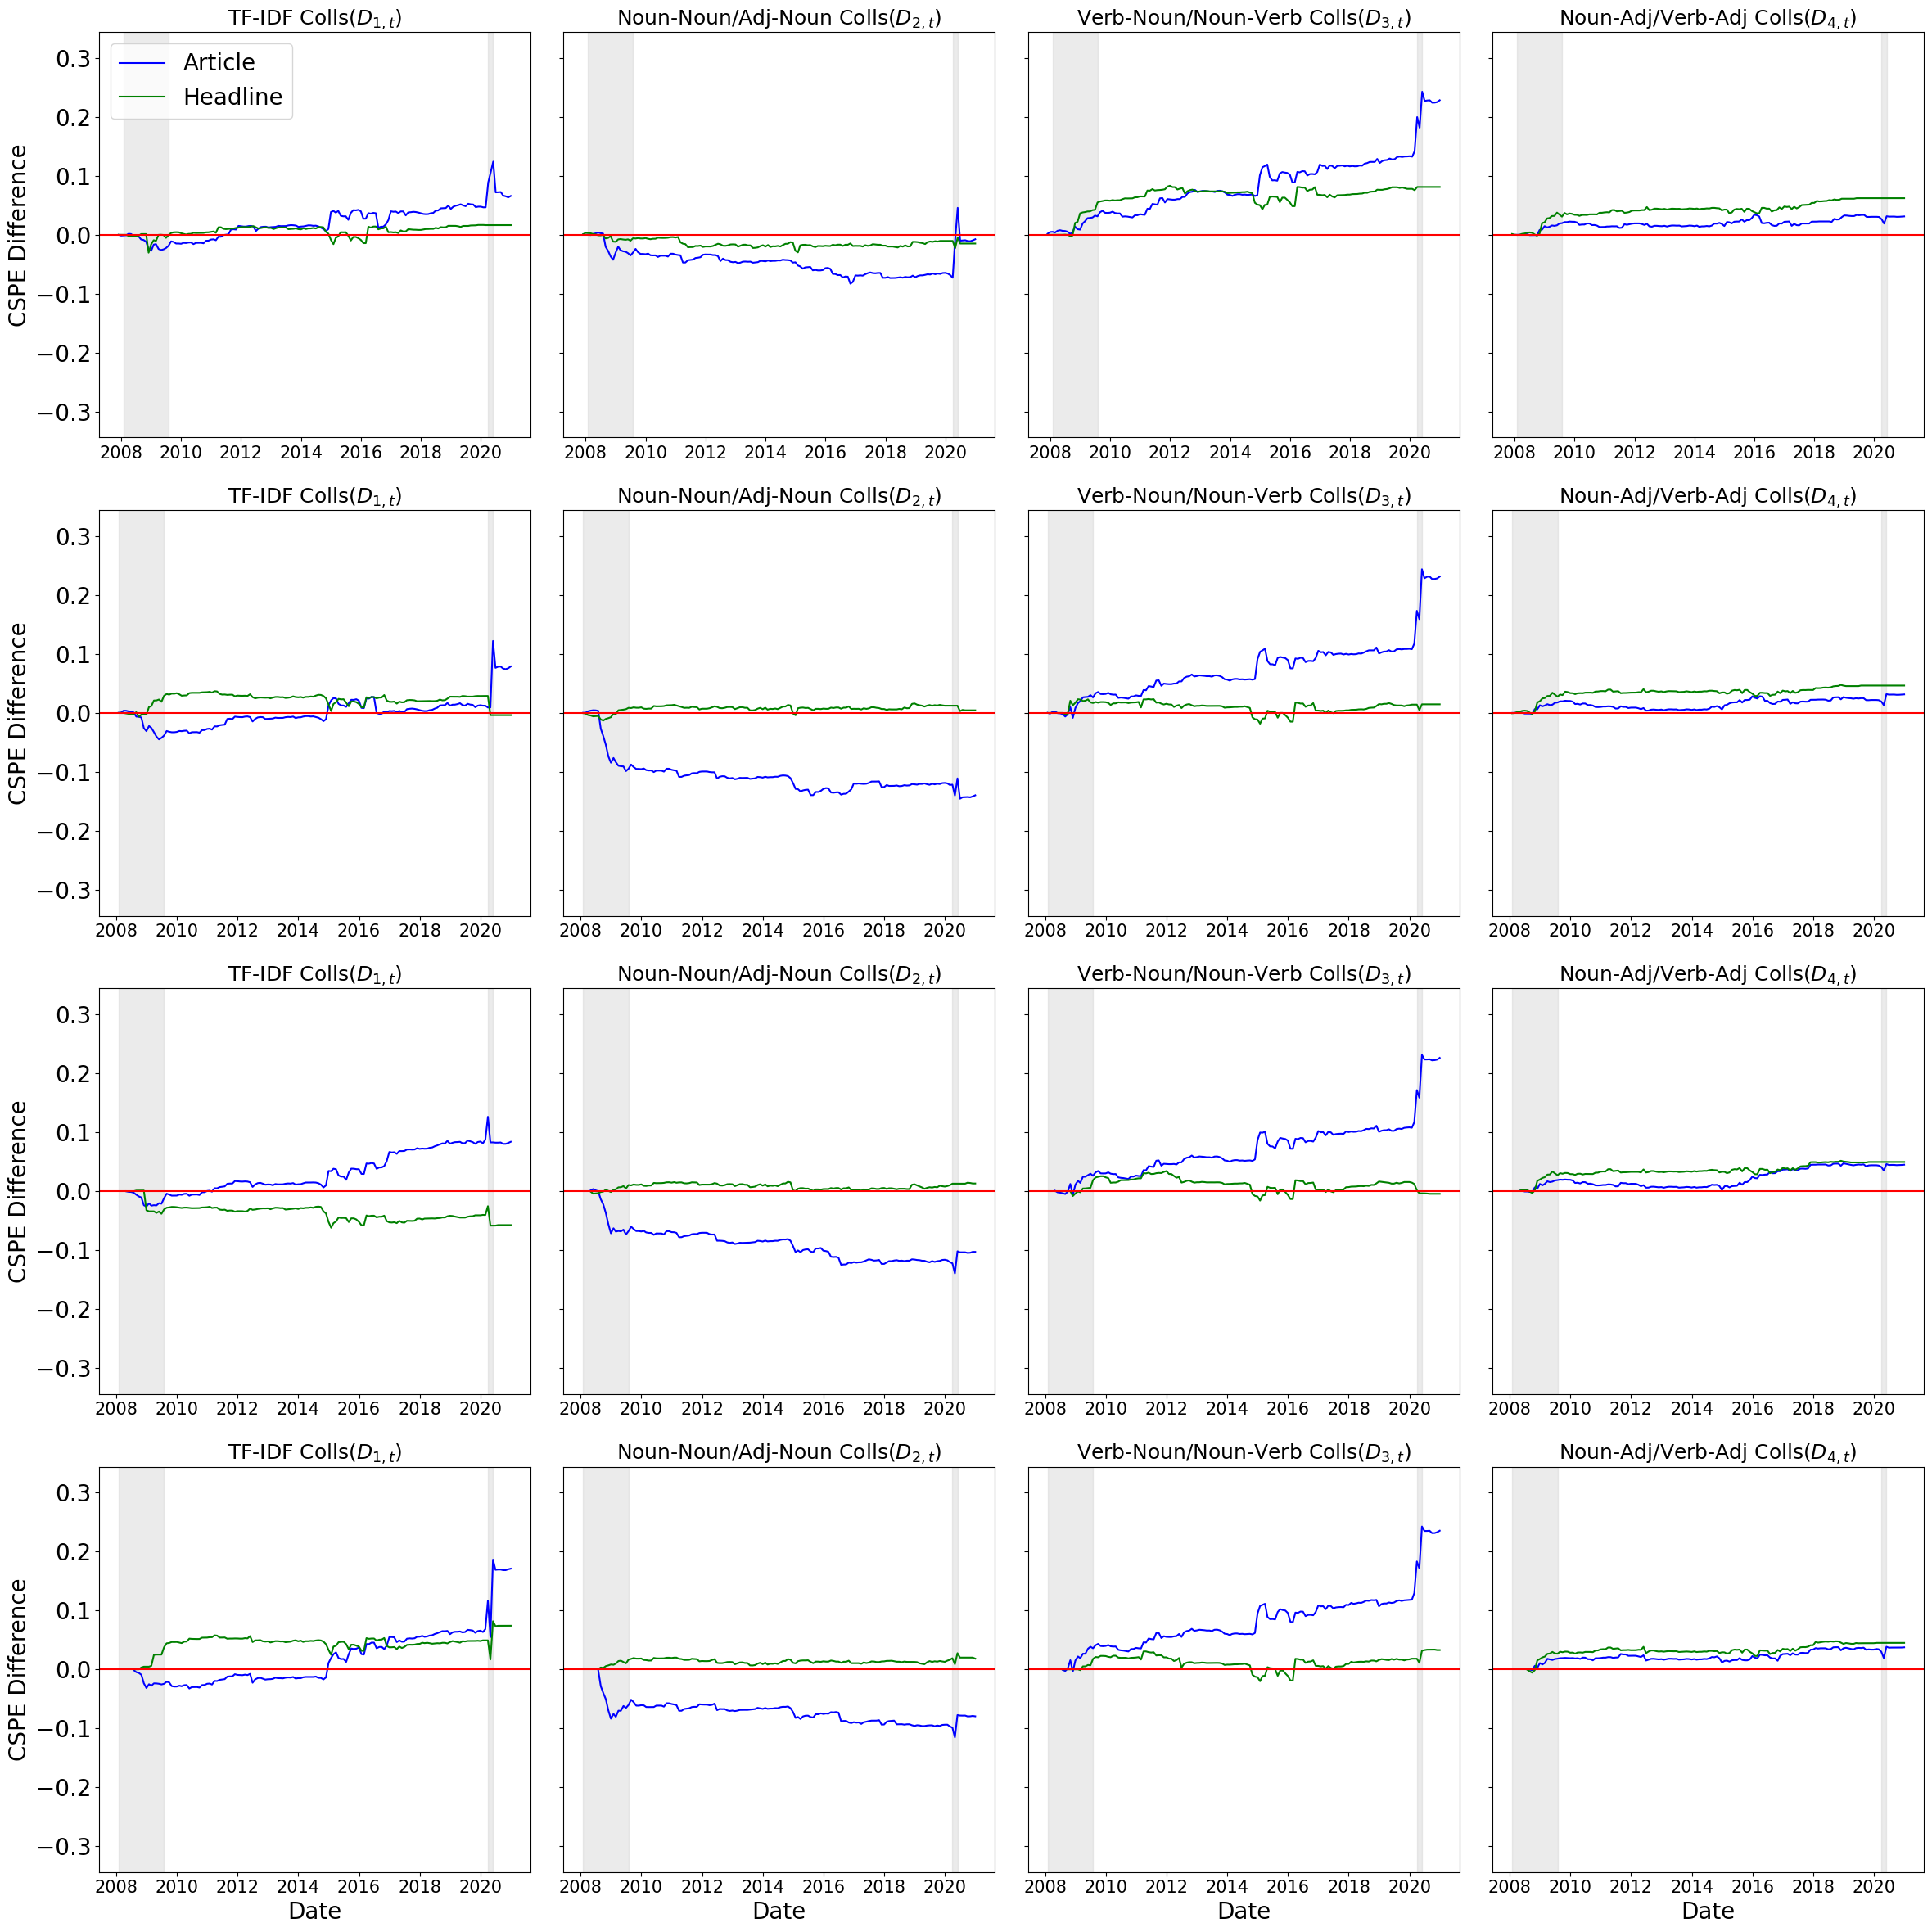

In [16]:
dates = test_dates
models = list(Continuous_Article_predictions.keys())
n_horizons = len(horizons)
n_models = len(models)

# Create a grid of subplots: n_horizons rows and n_models columns
fig, axs = plt.subplots(n_horizons, n_models, figsize=(6*n_models, 6*n_horizons), sharey=True)

# Check if axs is a single object, which happens when n_horizons or n_models is 1
if not isinstance(axs, np.ndarray):
    axs = np.array([axs])

# Flatten array to easily iterate over it in a single loop
axs = axs.ravel()

# Calculate global y-axis limits
global_y_min = 0
global_y_max = 0

# Pre-calculate all y-values for determining global y-limits (from both Article and Headline)
for h in horizons:
    for model_name in models:
        # For Article predictions
        y_benchmark = np.array(Benchmark_model_1[model_name][h])
        y_true = np.array(True_values[model_name][h])
        y_pred_article = np.array(Continuous_Article_predictions[model_name][h])
        e1_article = (y_true - y_pred_article) ** 2
        e2_article = (y_true - y_benchmark) ** 2
        y_values_article = np.cumsum(e2_article) - np.cumsum(e1_article)
        
        # For Headline predictions
        y_pred_headline = np.array(Continuous_Headline_predictions[model_name][h])
        e1_headline = (y_true - y_pred_headline) ** 2
        e2_headline = (y_true - y_benchmark) ** 2
        y_values_headline = np.cumsum(e2_headline) - np.cumsum(e1_headline)

        global_y_min = min(global_y_min, y_values_article.min(), y_values_headline.min())
        global_y_max = max(global_y_max, y_values_article.max(), y_values_headline.max())

# Adjust y-limits slightly for visual clarity
y_abs_max = max(abs(global_y_min), abs(global_y_max))
global_y_limits = (-y_abs_max-0.1, y_abs_max+0.1)

# Loop to plot both Article and Headline data in the same subplot
for h_idx, h in enumerate(horizons):
    for m_idx, model_name in enumerate(models):
        ax_idx = n_models * h_idx + m_idx
        ax = axs[ax_idx]

        # For Article (blue line)
        y_benchmark = np.array(Benchmark_model_1[model_name][h])
        y_true = np.array(True_values[model_name][h])
        y_pred_article = np.array(Continuous_Article_predictions[model_name][h])
        e1_article = (y_true - y_pred_article) ** 2
        e2_article = (y_true - y_benchmark) ** 2
        y_values_article = np.cumsum(e2_article) - np.cumsum(e1_article)

        # For Headline (green line)
        y_pred_headline = np.array(Continuous_Headline_predictions[model_name][h])
        e1_headline = (y_true - y_pred_headline) ** 2
        e2_headline = (y_true - y_benchmark) ** 2
        y_values_headline = np.cumsum(e2_headline) - np.cumsum(e1_headline)

        # Adjust dates based on the horizon
        adjusted_dates = dates[(h-1):]

        # Plot both Article and Headline on the same axes
        ax.plot(adjusted_dates, y_values_article, color='blue')
        ax.plot(adjusted_dates, y_values_headline, color='green')

        # Highlight recession periods dynamically
        for start, end in zip(recessions.index[recessions.diff() == 1], recessions.index[recessions.diff() == -1]):
            if start in dates and end in dates:
                ax.axvspan(start, end, color='silver', alpha=0.3)

        ax.axhline(0, color='red', linestyle='-')
        ax.set_ylim(global_y_limits)
        ax.set_title(model_name, fontsize = 18)
        if h_idx == n_horizons - 1:
            ax.set_xlabel('Date', fontsize = 20)
        if m_idx == 0:
            ax.set_ylabel('CSPE Difference', fontsize = 20)

        # Add legend only to the very first plot (first subplot in the grid)
        if h_idx == 0 and m_idx == 0:
            ax.legend(['Article', 'Headline'], loc='upper left')

plt.tight_layout()
fig.savefig("main results/Figure9.pdf", format="pdf", bbox_inches="tight", dpi=600)
print("Plot saved as 'main results/Figure9.pdf'")

Plot saved as 'main results/Figure10.pdf'


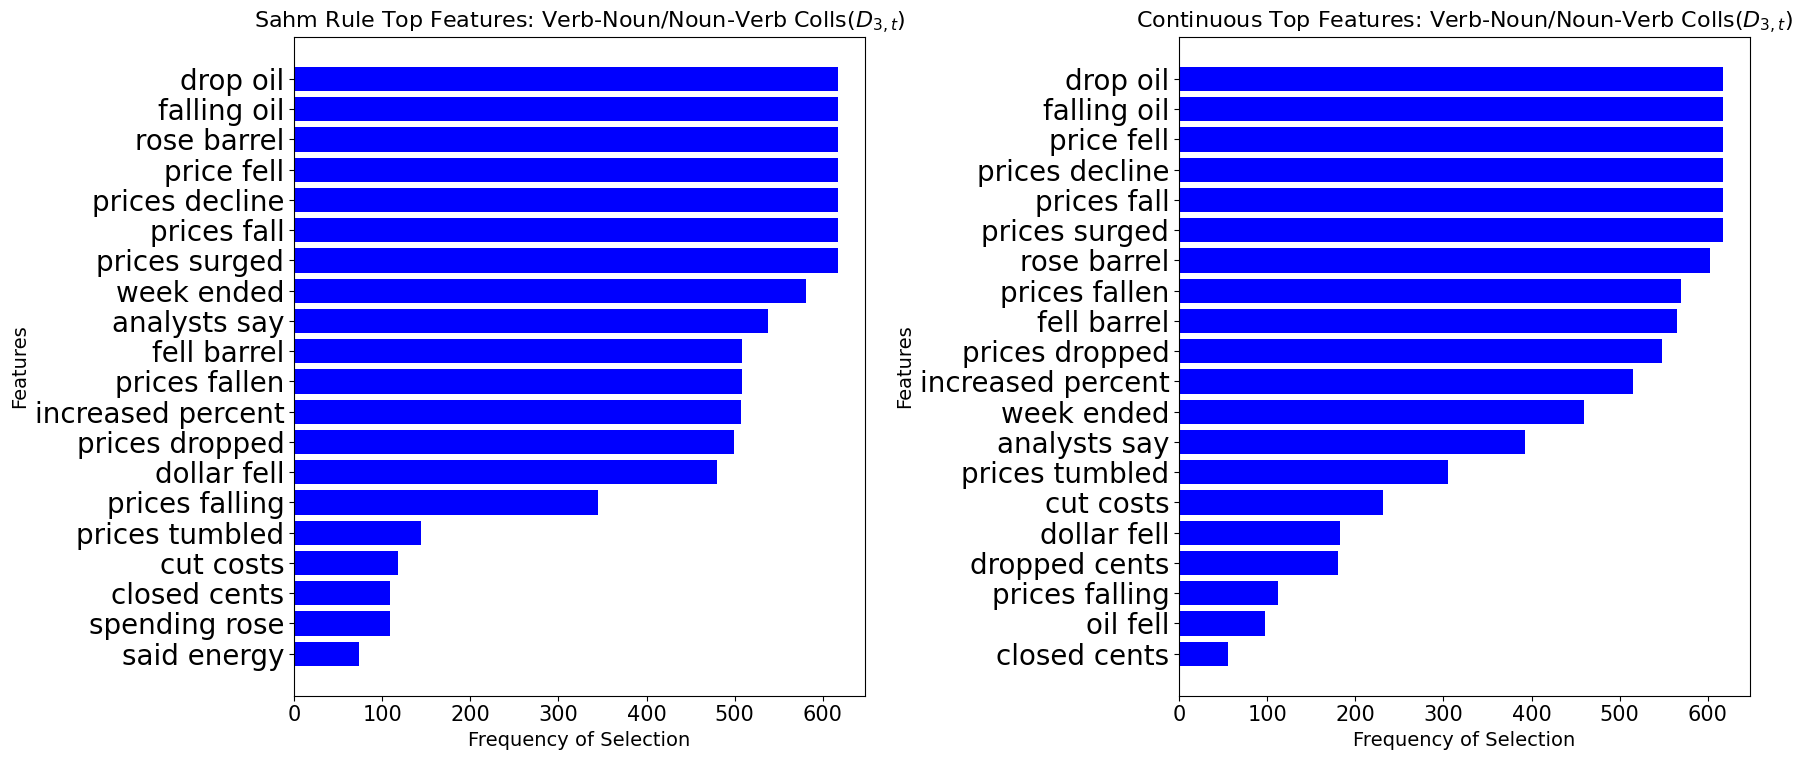

In [17]:
# Number of top features
N = 20

# Function to plot top features for a dataset (articles or headlines)
def plot_top_features_side_by_side(article_model, headline_model, title_prefix_article, title_prefix_headline):
    # Create a figure with 1 row and 2 columns (for side-by-side plots)
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 8))

    # Plot for Articles (third model)
    article_model_name = list(article_model.keys())[2]  # Getting the third model from articles
    top_features_article = article_model[article_model_name]
    feature_names_article, frequencies_article = zip(*top_features_article)

    axes[0].barh(feature_names_article, frequencies_article, color='blue')
    axes[0].set_xlabel('Frequency of Selection', fontsize=14)
    axes[0].set_ylabel('Features', fontsize=14)
    axes[0].set_title(f'{title_prefix_article}: {article_model_name}', fontsize=16)
    axes[0].invert_yaxis()  # Display the highest frequency at the top

    # Plot for Headlines (third model)
    headline_model_name = list(headline_model.keys())[2]  # Getting the third model from headlines
    top_features_headline = headline_model[headline_model_name]
    feature_names_headline, frequencies_headline = zip(*top_features_headline)

    axes[1].barh(feature_names_headline, frequencies_headline, color='blue')
    axes[1].set_xlabel('Frequency of Selection', fontsize=14)
    axes[1].set_ylabel('Features', fontsize=14)
    axes[1].set_title(f'{title_prefix_headline}: {headline_model_name}', fontsize=16)
    axes[1].invert_yaxis()  # Display the highest frequency at the top

    plt.tight_layout()
    fig.savefig("main results/Figure10.pdf", format="pdf", bbox_inches="tight", dpi=600)
    print("Plot saved as 'main results/Figure10.pdf'")

# Call the function for the third model of Articles and Headlines
plot_top_features_side_by_side(Sahm_Rule_Article_top_features_per_model, Continuous_Article_top_features_per_model,
                               title_prefix_article="Sahm Rule Top Features", title_prefix_headline="Continuous Top Features")

In [18]:
# Selecting specific columns
columns = ['cut costs', 'closed cents', 'drop oil', 'falling oil', 'fell barrel', 'increased percent', 
           'rose barrel', 'analysts say', 'dollar fell', 'price fell', 'prices decline', 
           'prices dropped', 'prices fall', 'prices fallen', 'prices surged', 'week ended', 
           'prices tumbled', 'spending rose', 'said energy', 'prices falling']
new_df = Data[columns]

# Standardizing the data
scaler = StandardScaler()
new_df_scaled = scaler.fit_transform(new_df)

# Applying PCA to reduce dimensions to 1 principal component
pca = PCA(n_components=1)
principal_component = pca.fit_transform(new_df_scaled)
principal_df = pd.DataFrame(data=principal_component, columns=['principal_component'])

loadings = pca.components_.T  # Transpose to align with original variables
loading_df = pd.DataFrame(loadings, index=new_df.columns, columns=['PC1 Loadings'])

principal_df.index = Target.index
principal_df = principal_df.iloc[1:, :]
Target = Target.iloc[1:, :]

# Step 2: Calculate the lag of the target variable
monthly_oil_log_diff_lag = Target.shift(1)
monthly_oil_log_diff_lag = monthly_oil_log_diff_lag.iloc[1:, :]

monthly_oil_log_diff_lag.columns = ['monthly_oil_log_diff_lag']
lagged_df = monthly_oil_log_diff_lag



# Step 4: Combine the lagged series with the PCA DataFrame
combined_df = lagged_df.join(principal_df, how='inner')  # Using 'inner' to ensure there are no NaN rows

# Step 5: Prepare the data for OLS
combined_df = combined_df.dropna()  # Drop rows with NaN values

# Step 6: Define the independent variables and add a constant for the intercept
X = add_constant(combined_df[['monthly_oil_log_diff_lag', 'principal_component']])
y = Target.loc[X.index]  # Aligning dependent variable with X

# Step 7: Perform OLS regression
model = OLS(y, X).fit()
summary = model.summary()
with open("main results/Table9.txt", "w") as f:
    f.write(summary.as_text())

Plot saved as 'main results/Figure11.pdf'


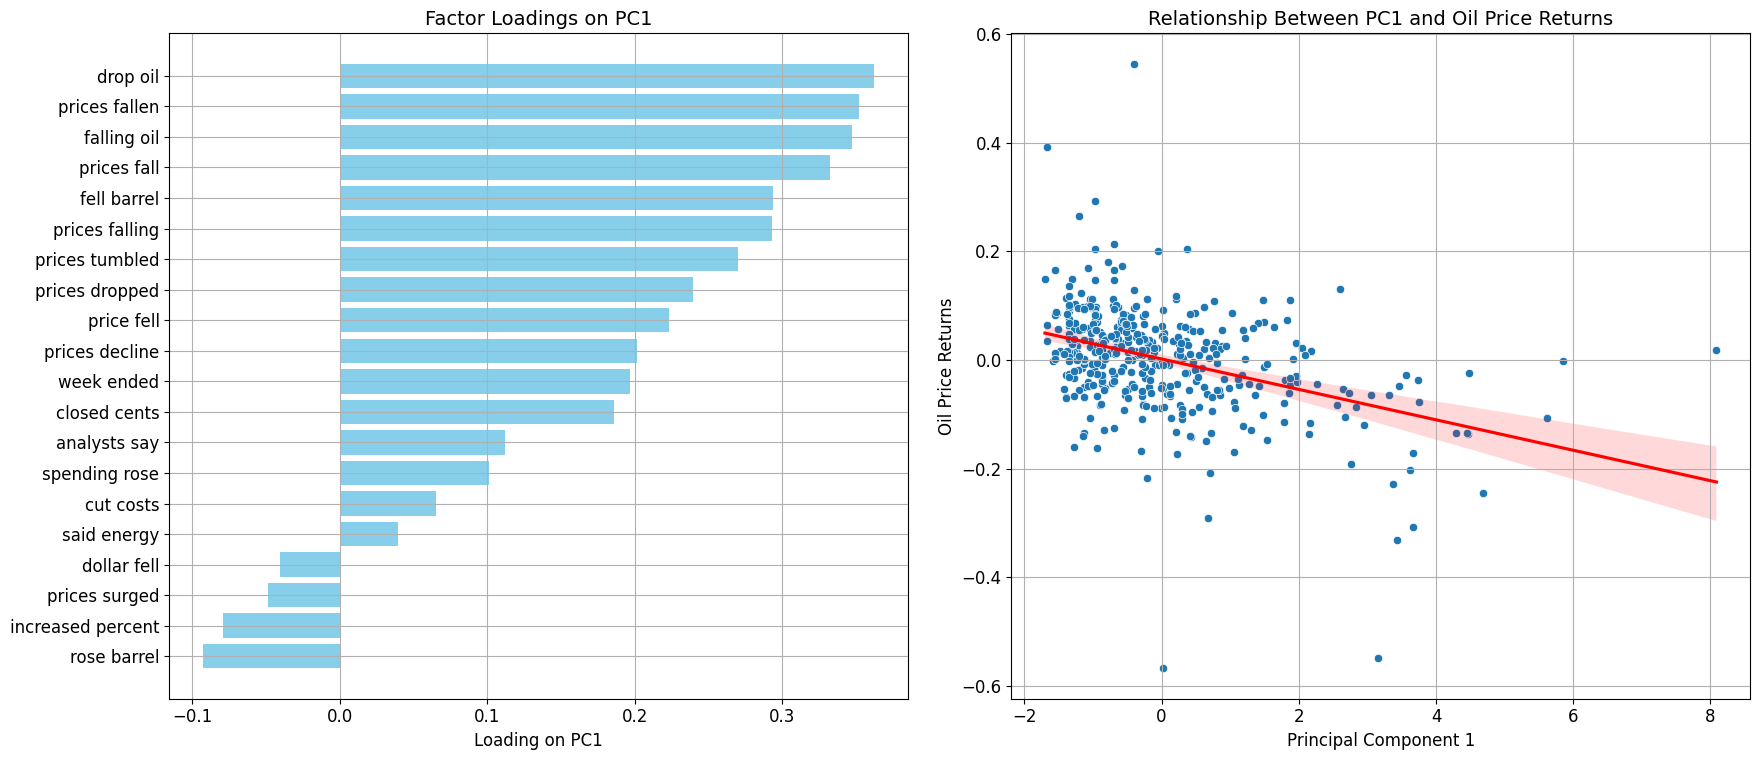

In [19]:
# Assuming 'loading_df' and 'combined_df' are properly defined
loading_df.sort_values(by='PC1 Loadings', inplace=True)
y = y.values.ravel()

# Create a figure and a set of subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 8))

# First subplot for Factor Loadings on PC1
axes[0].barh(loading_df.index, loading_df['PC1 Loadings'], color='skyblue')
axes[0].set_xlabel('Loading on PC1', fontsize=12)
axes[0].set_title('Factor Loadings on PC1', fontsize=14)
axes[0].tick_params(axis='both', labelsize=12)  # Adjust to fit your style
axes[0].grid(True)

# Second subplot for the relationship between PC1 and oil price changes
sns.scatterplot(ax=axes[1], data=combined_df, x='principal_component', y=y)
sns.regplot(ax=axes[1], data=combined_df, x='principal_component', y=y, scatter=False, color='red')
axes[1].set_title('Relationship Between PC1 and Oil Price Returns', fontsize=14)
axes[1].set_xlabel('Principal Component 1', fontsize=12)
axes[1].set_ylabel('Oil Price Returns', fontsize=12)
axes[1].tick_params(axis='both', labelsize=12)
axes[1].grid(True)

plt.tight_layout()
fig.savefig("main results/Figure11.pdf", format="pdf", bbox_inches="tight", dpi=600)
print("Plot saved as 'main results/Figure11.pdf'")